In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [56]:
adata = sc.read('../../../../pipeline/data/multigrate_mil/totalvi_pbmc_embed_3_cond/a391e1e9e7_adata_both.h5ad')
adata

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 590724 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch', 'group', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    obsm: 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Cate

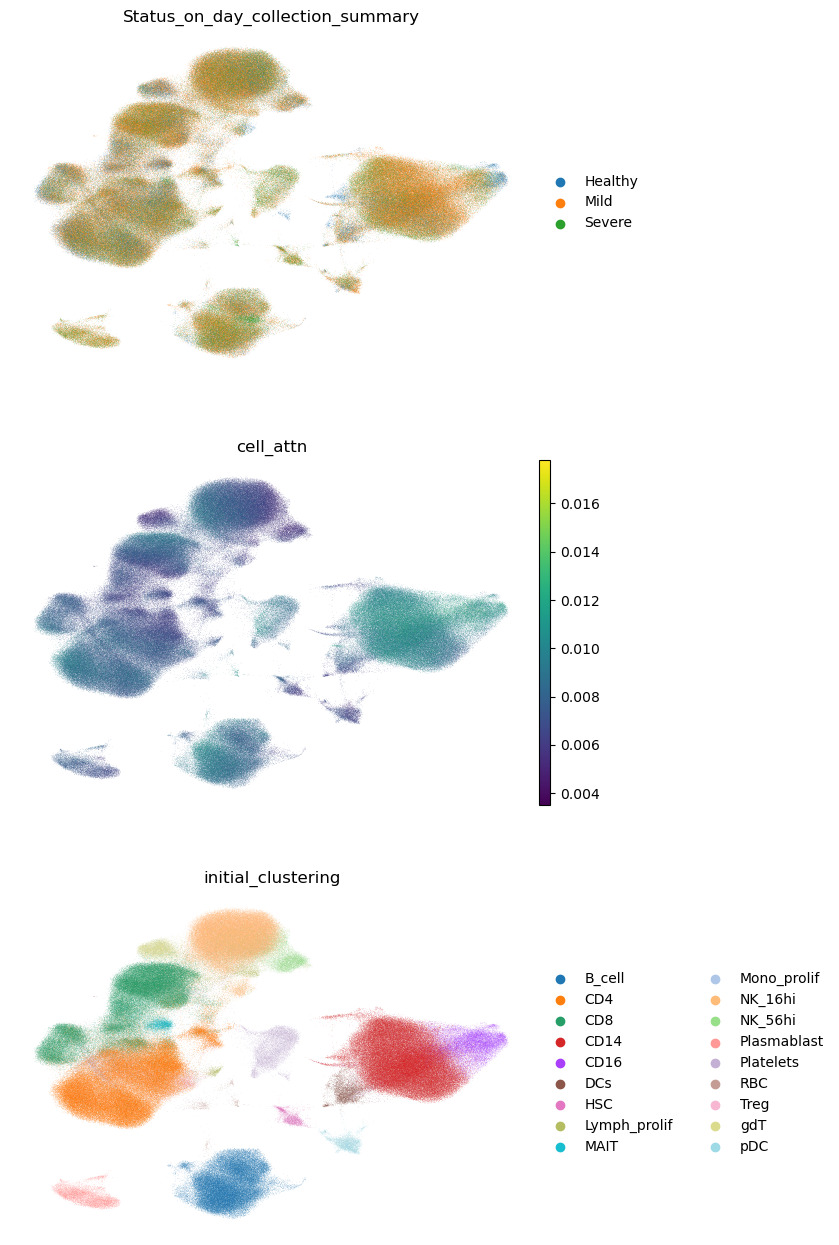

In [57]:
sc.pl.umap(adata, color=['Status_on_day_collection_summary', 'cell_attn', 'initial_clustering'], ncols=1, frameon=False,)

## top 10% cells per condition

In [58]:
dfs = []
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    adata.obs[f'top_cells_{cond}'] = False
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['initial_clustering', 'Status_on_day_collection_summary']])

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


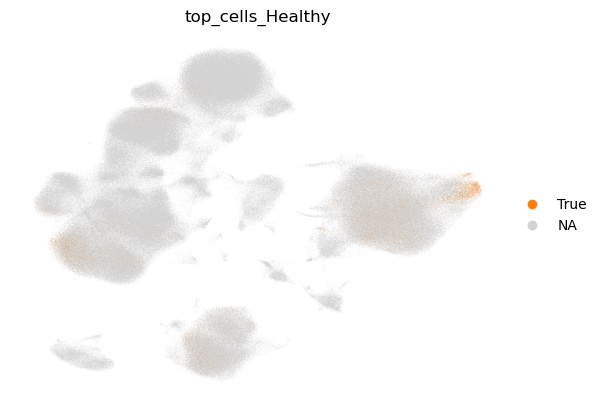

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


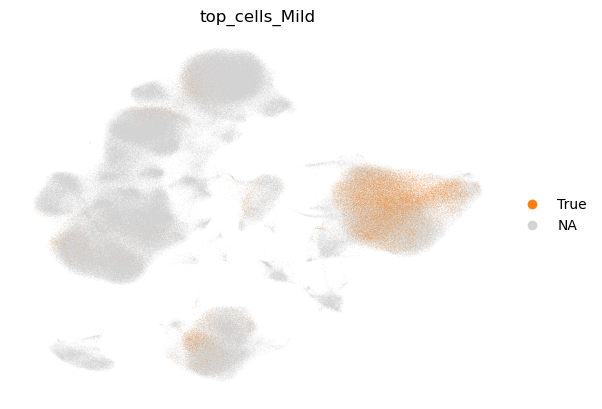

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


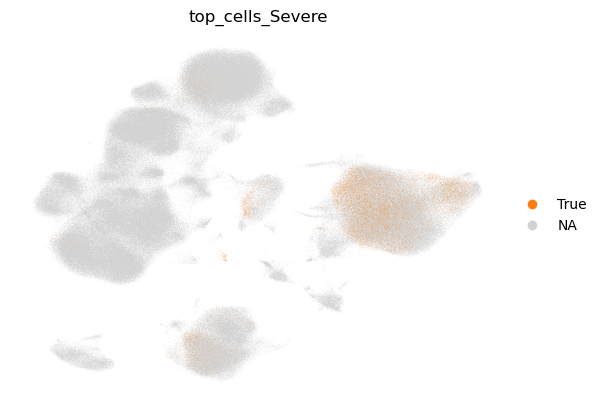

In [59]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

B_cell


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


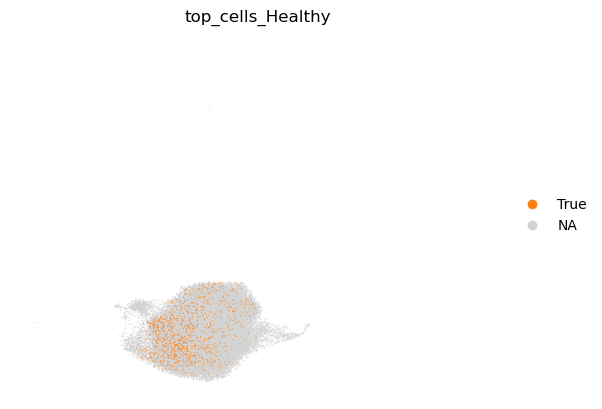

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


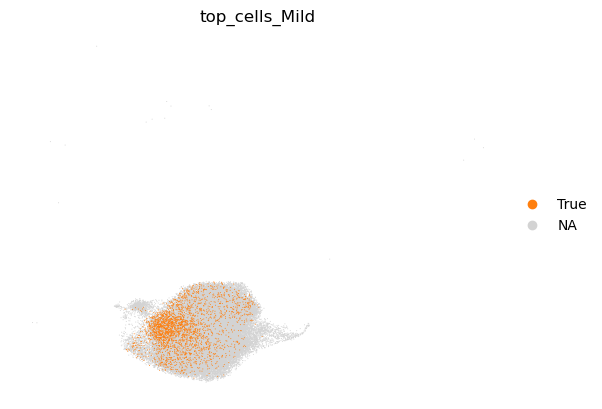

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


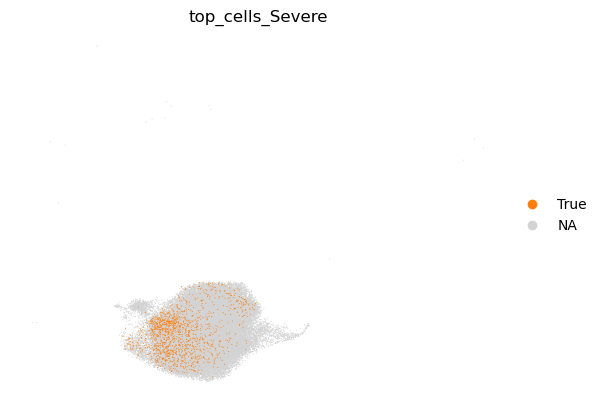

CD4


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


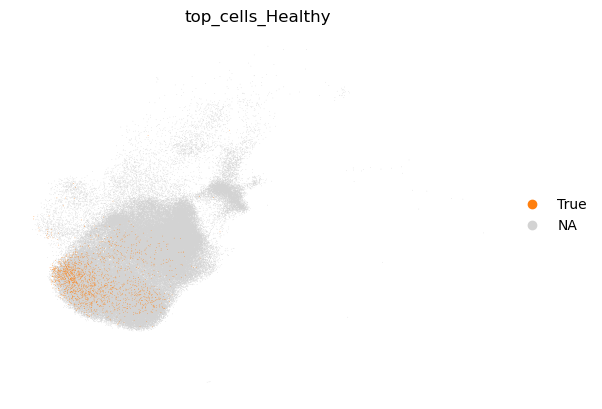

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


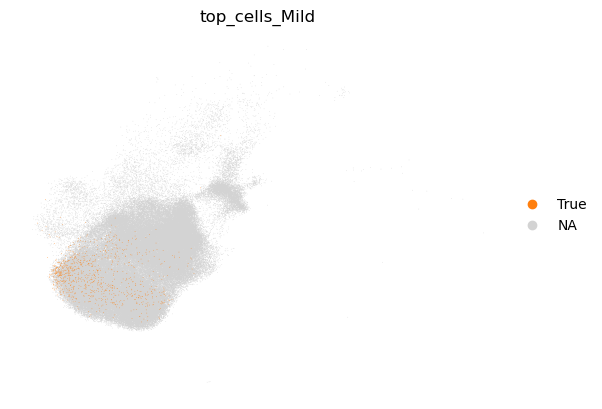

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


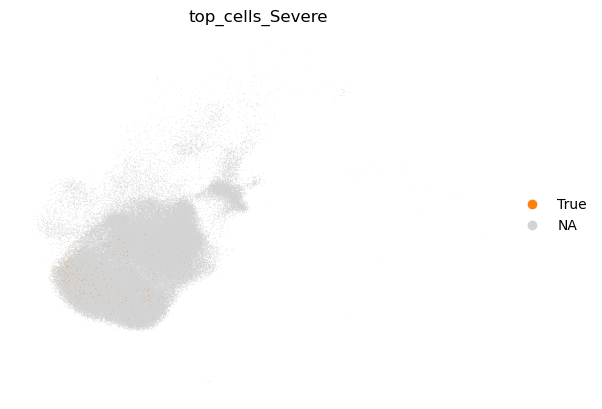

CD8


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


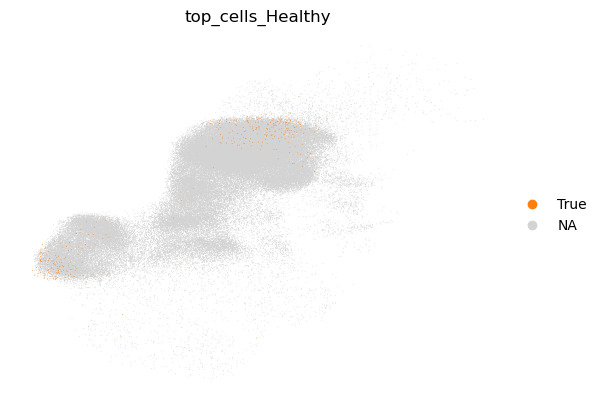

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


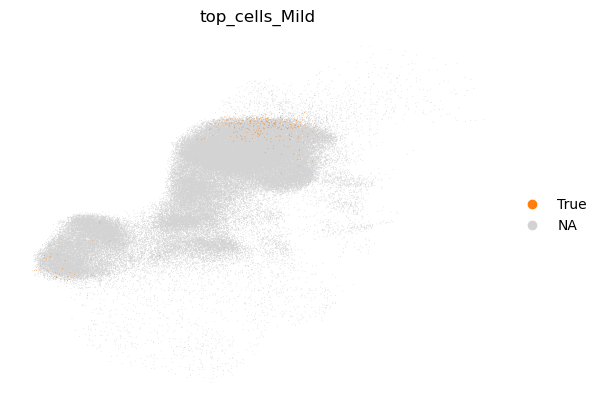

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


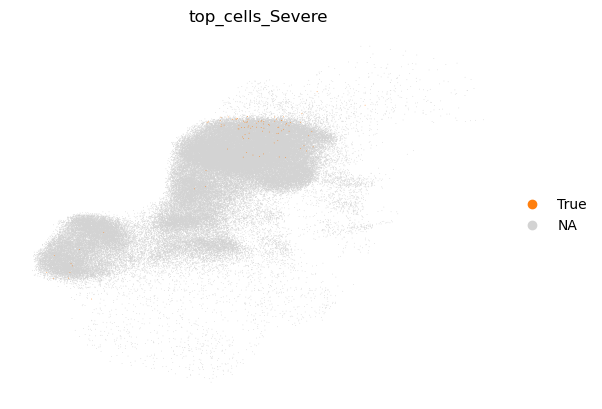

CD14


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


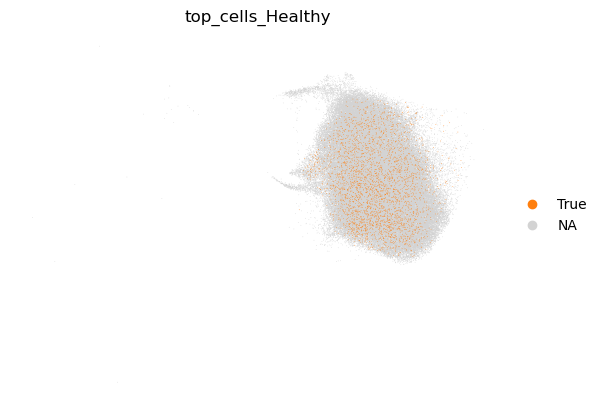

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


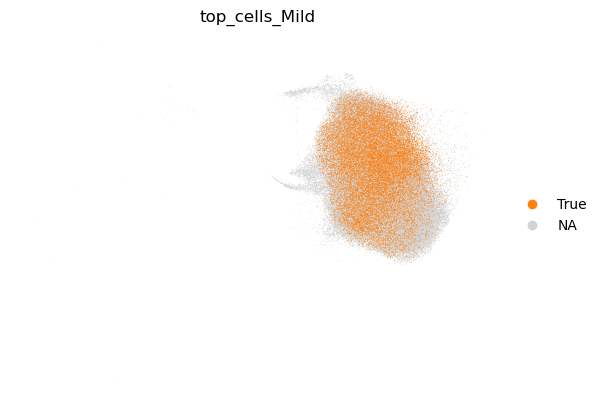

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


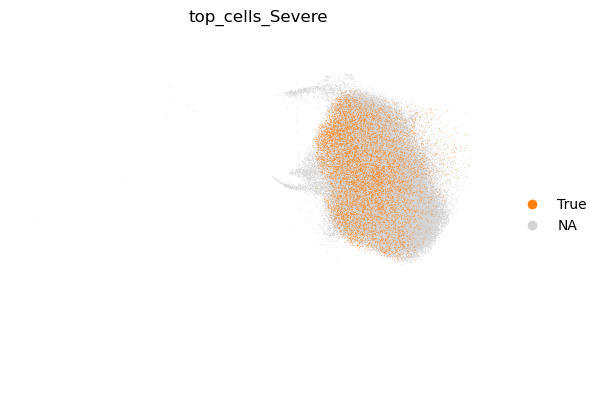

CD16


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


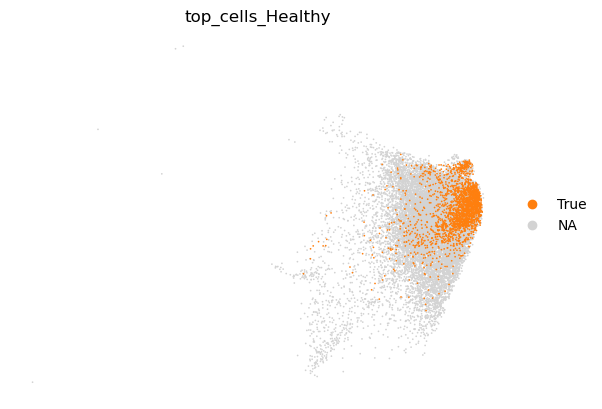

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


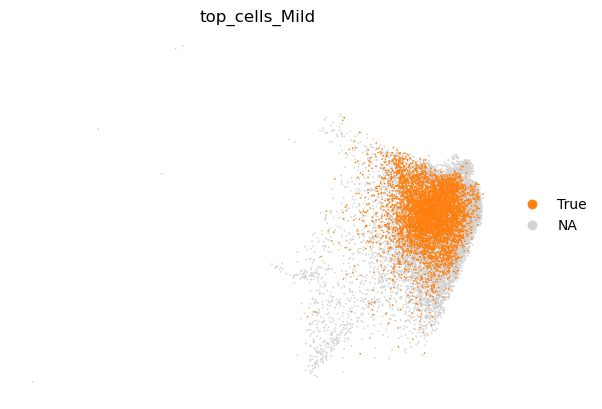

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


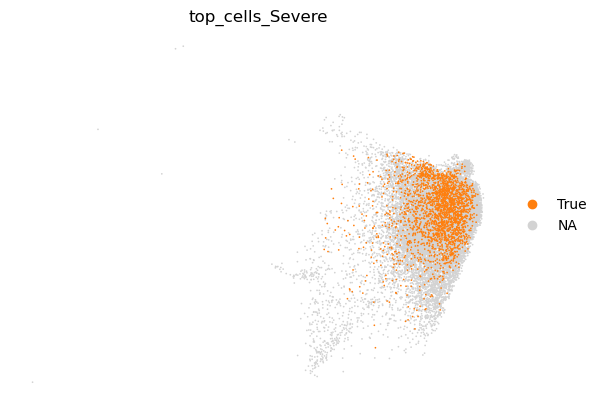

DCs


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


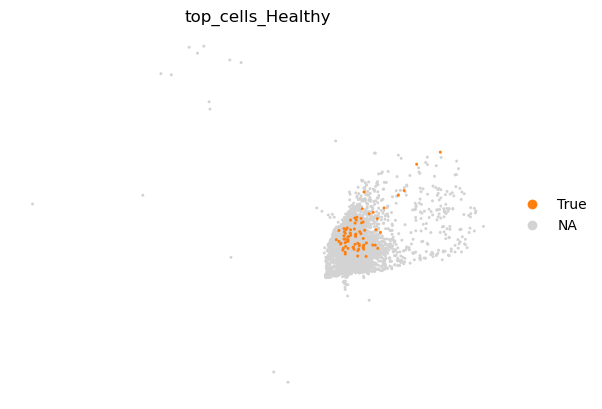

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


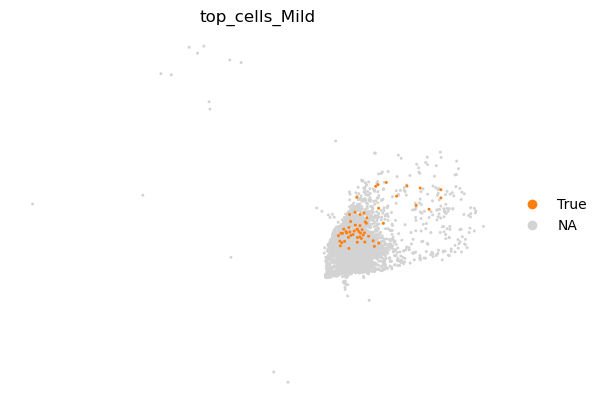

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


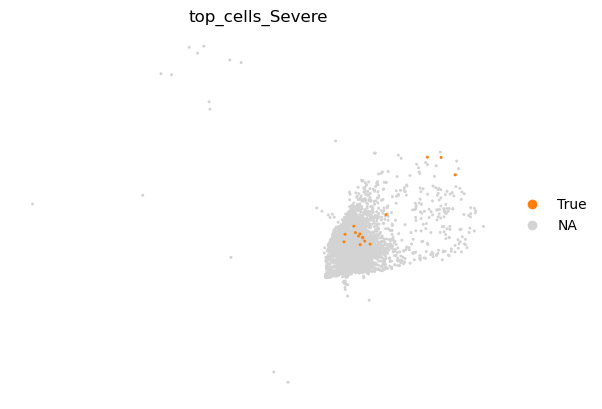

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


HSC


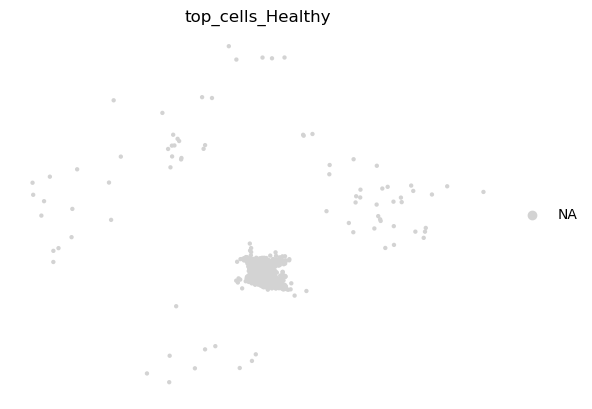

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


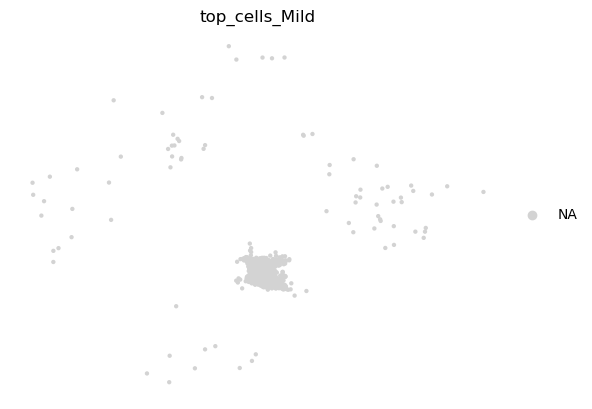

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


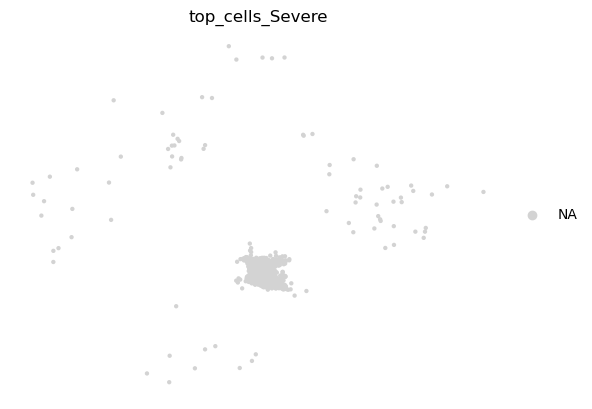

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Lymph_prolif


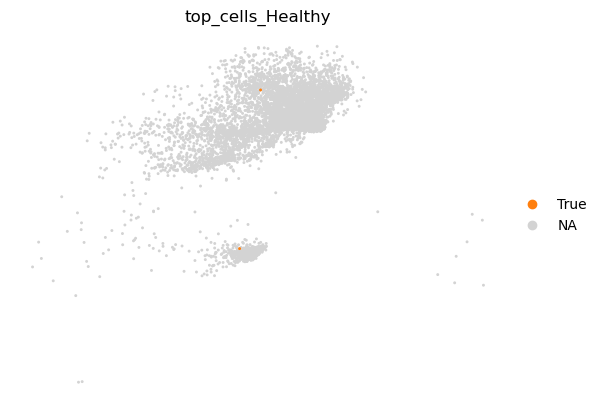

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


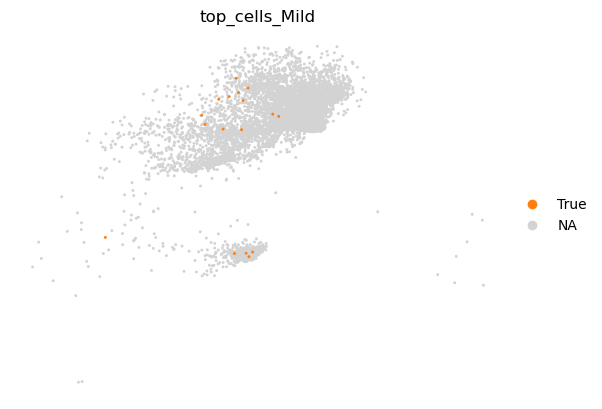

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


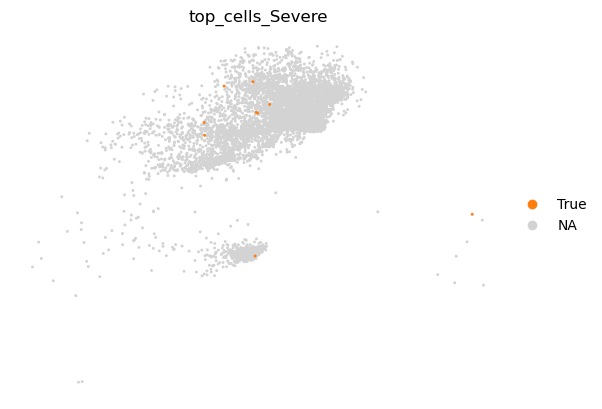

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


MAIT


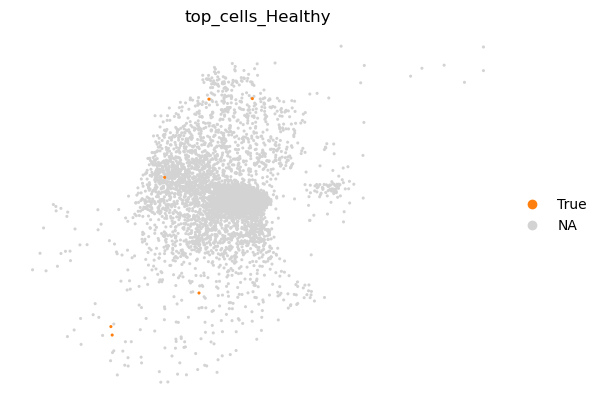

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


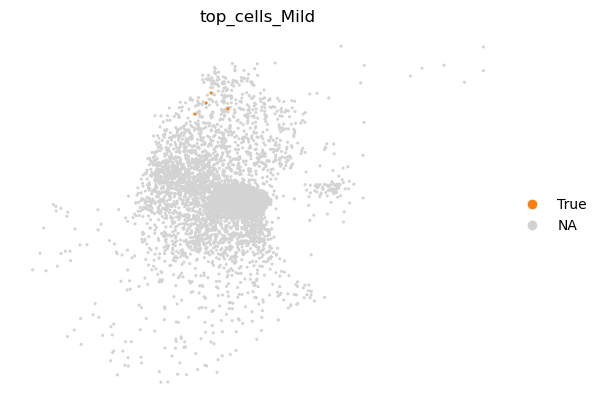

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


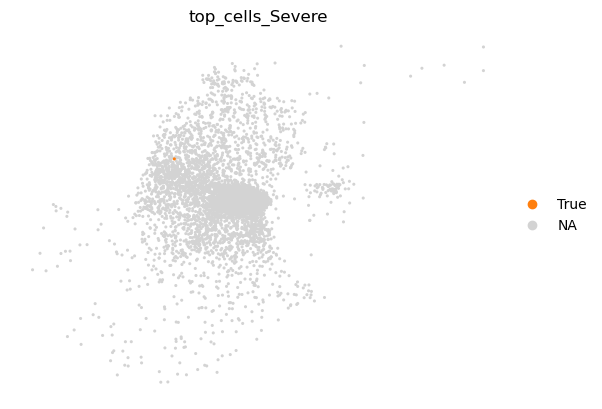

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Mono_prolif


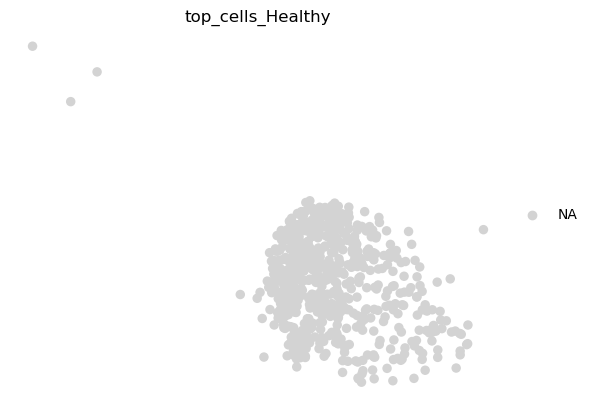

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


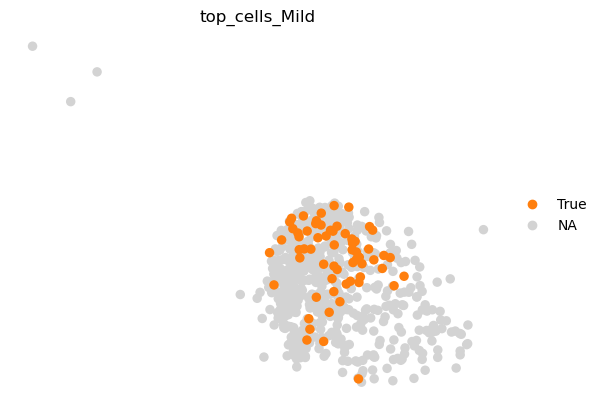

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


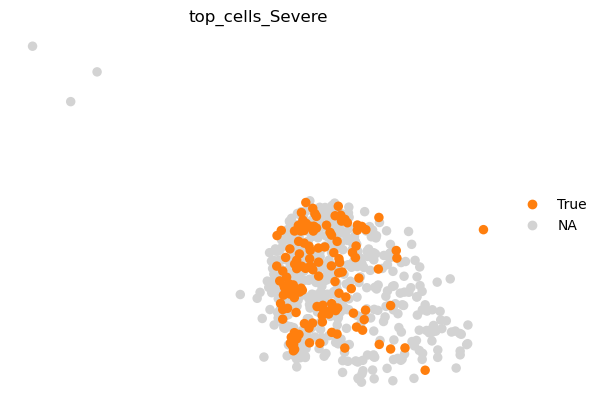

NK_16hi


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


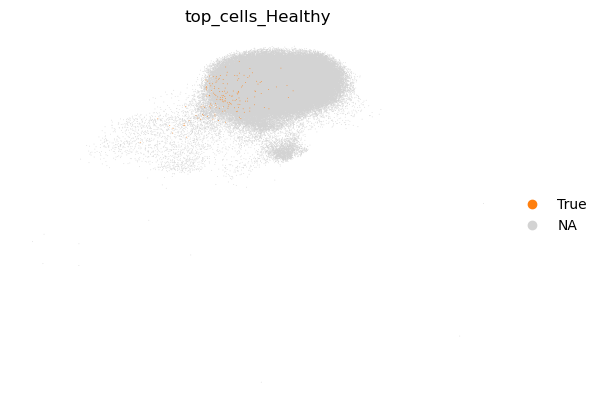

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


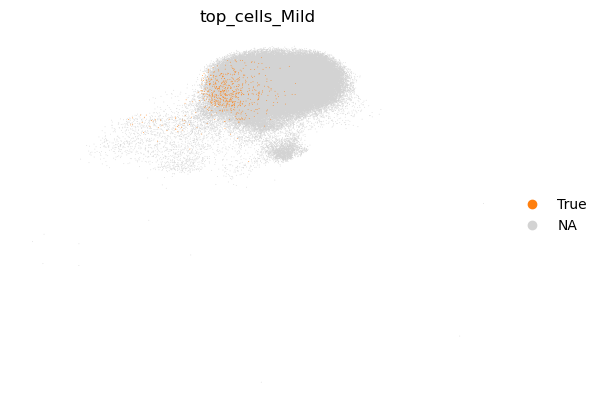

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


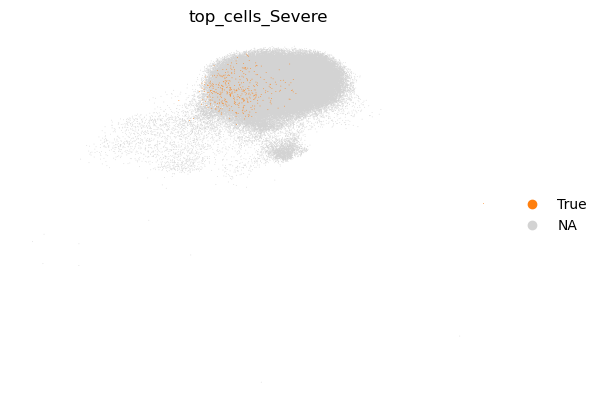

NK_56hi


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


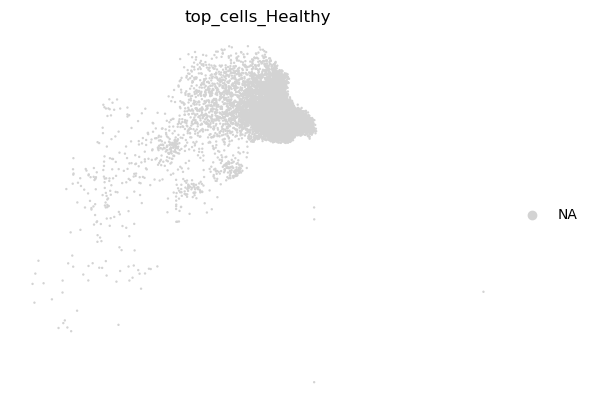

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


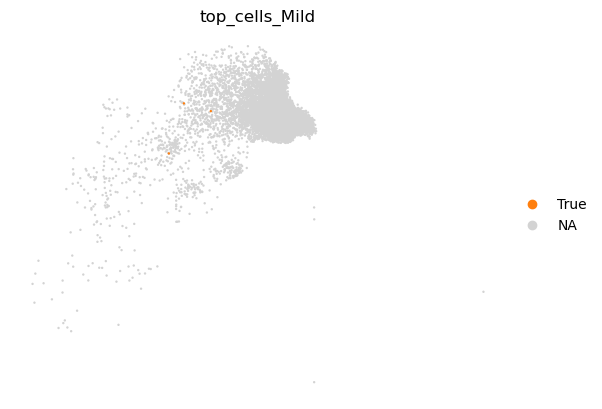

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


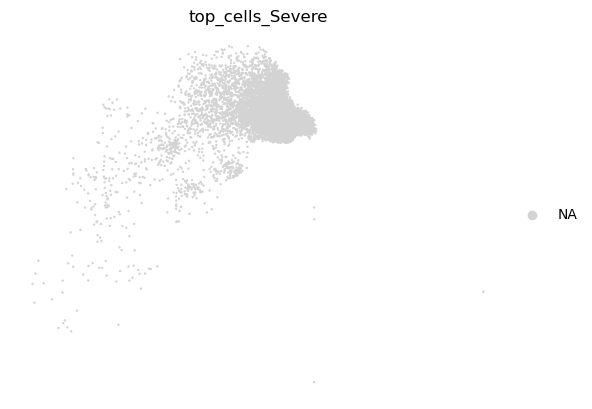

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Plasmablast


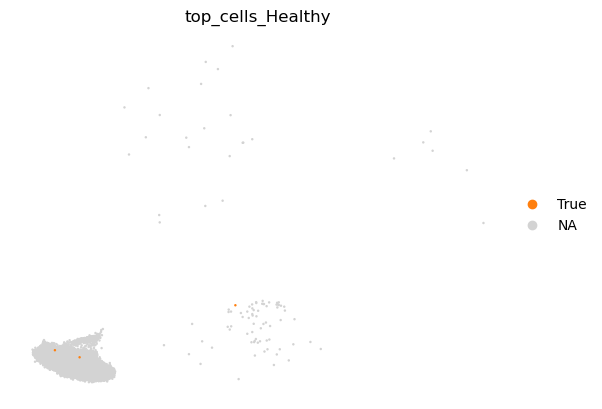

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


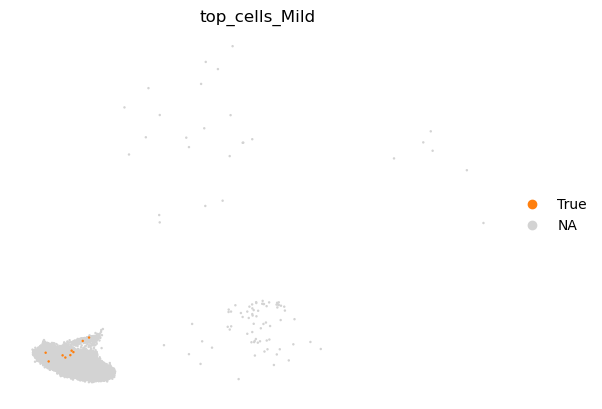

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


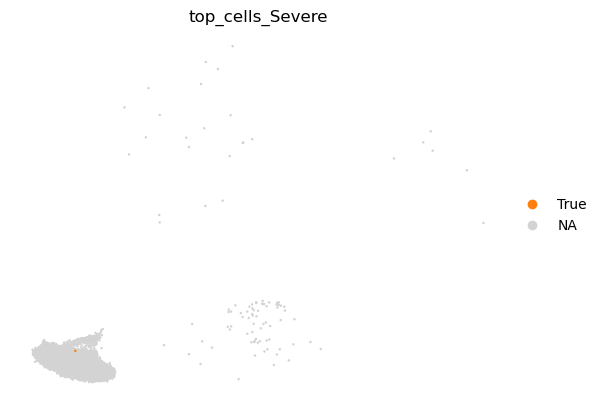

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))


Platelets


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


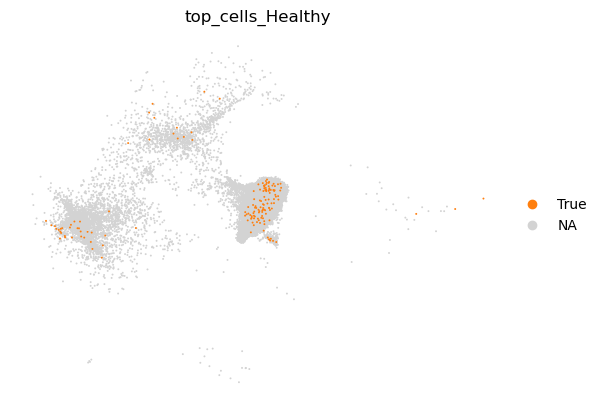

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


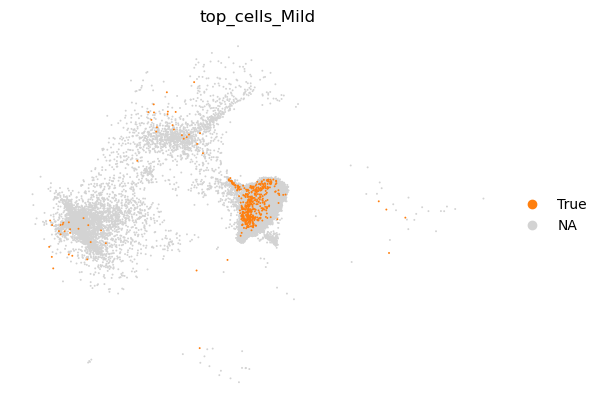

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


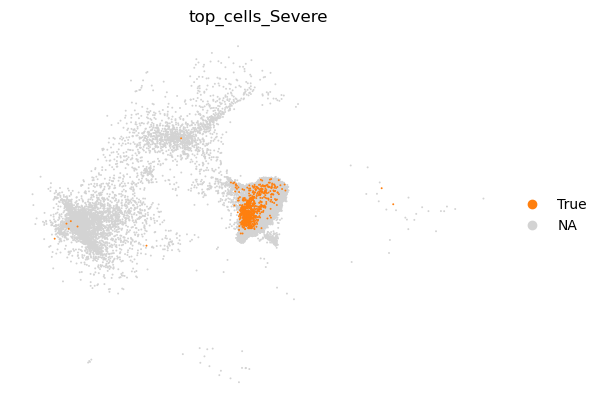

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


RBC


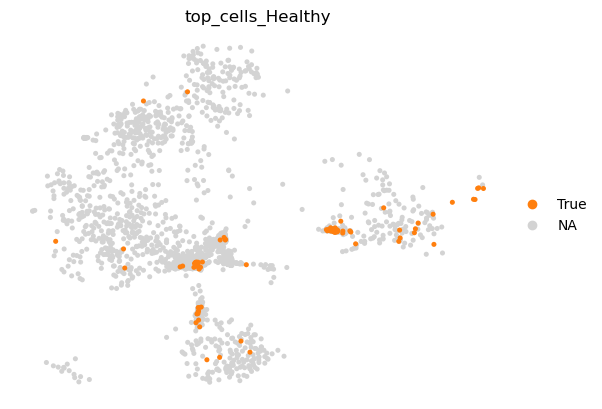

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


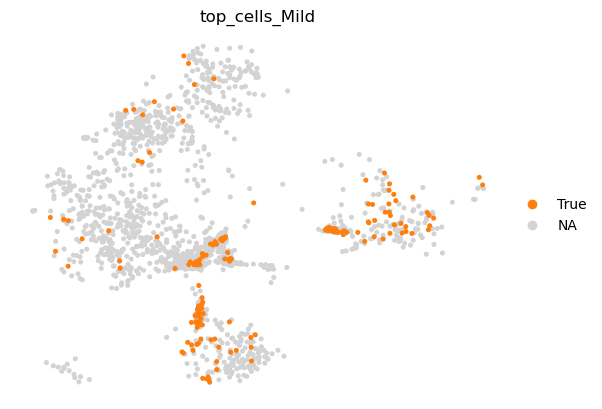

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


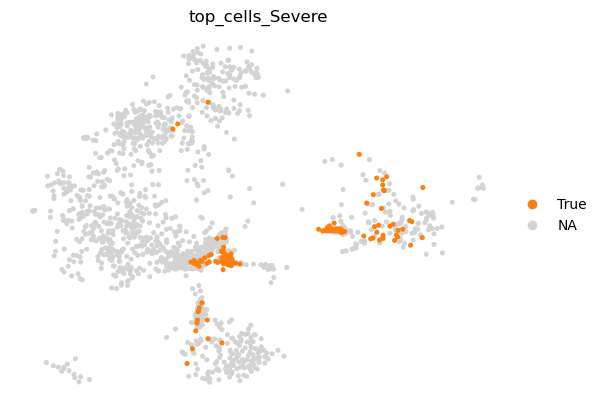

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Treg


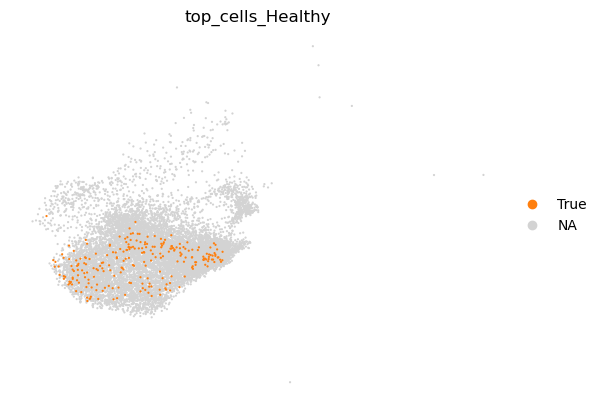

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


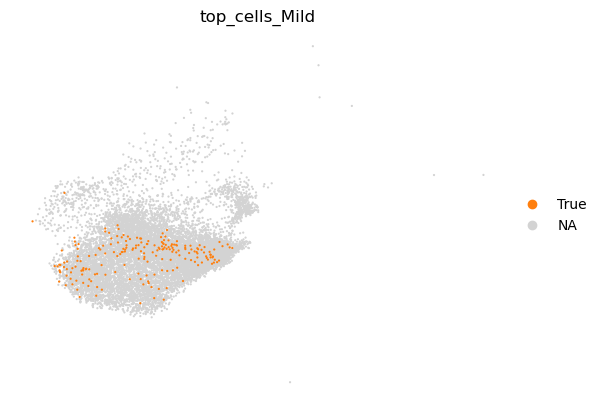

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


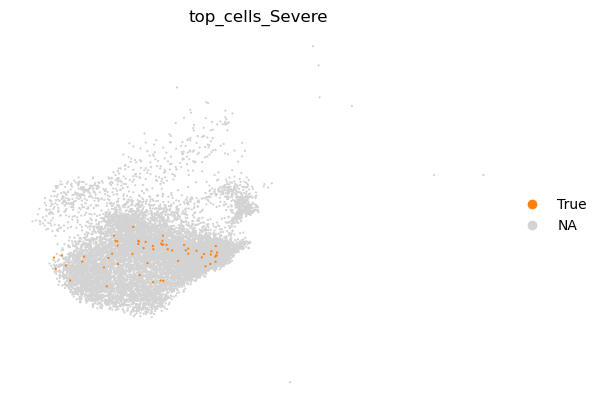

gdT


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


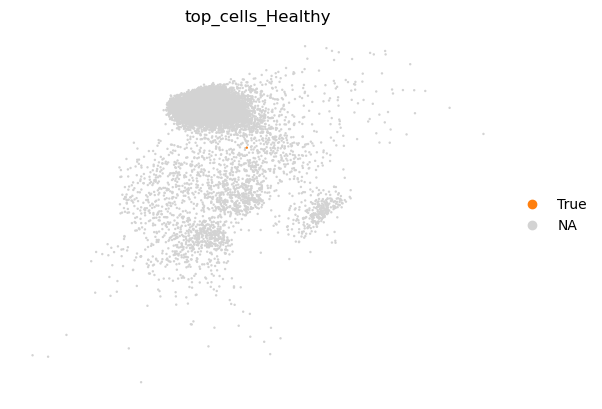

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


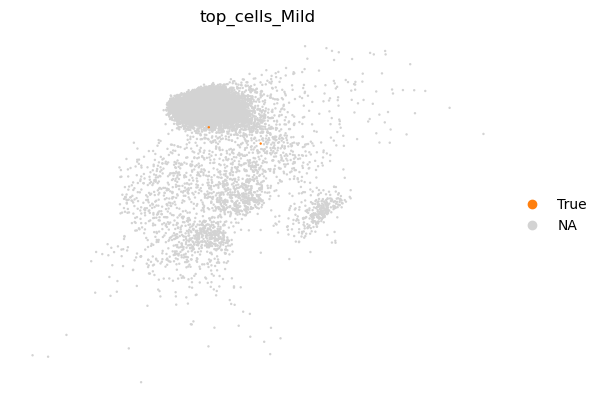

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


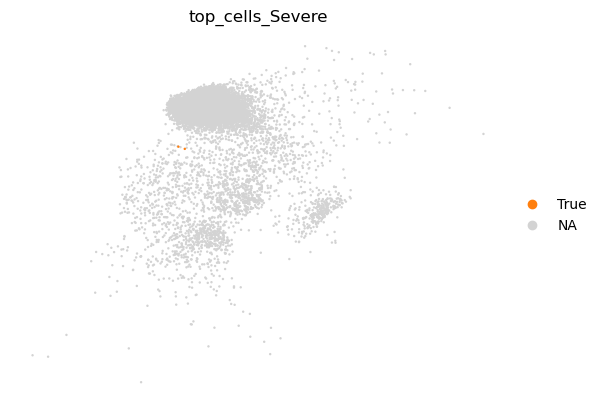

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


pDC


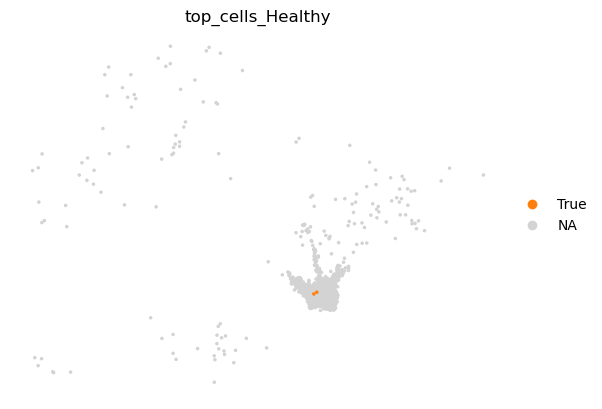

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


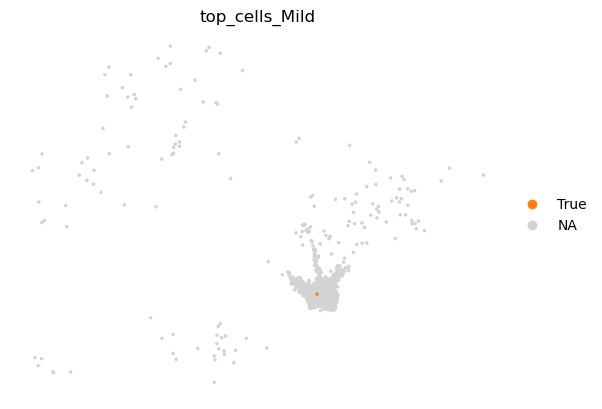

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


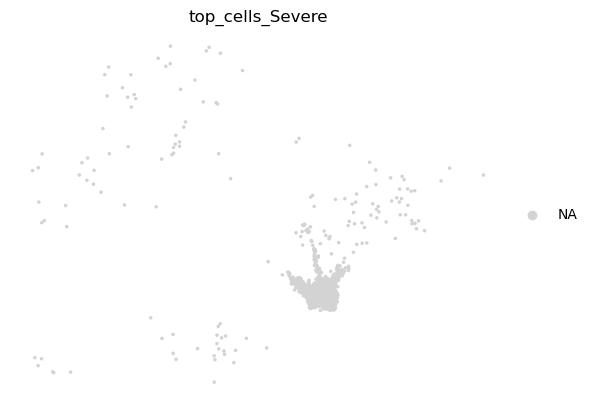

In [60]:
for ct in adata.obs['initial_clustering'].cat.categories:
    print('========')
    print(ct)
    adata_ct = adata[adata.obs['initial_clustering'] == ct].copy()
    for cond in np.unique(adata_ct.obs['Status_on_day_collection_summary']):
        sc.pl.umap(adata_ct, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

## top 10% cells per sample

In [61]:
dfs = []
adata.obs[f'top_cells_Healthy'] = False
adata.obs[f'top_cells_Mild'] = False
adata.obs[f'top_cells_Severe'] = False
for sample in np.unique(adata.obs['patient_id']):
    adata_tmp = adata[adata.obs['patient_id'] == sample].copy()
    cond = str(adata_tmp.obs['Status_on_day_collection_summary'][0])
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['initial_clustering', 'Status_on_day_collection_summary']])

/tmp/ipykernel_2806604/3955007602.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cond = str(adata_tmp.obs['Status_on_day_collection_summary'][0])
/tmp/ipykernel_2806604/3955007602.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cond = str(adata_tmp.obs['Status_on_day_collection_summary'][0])
/tmp/ipykernel_2806604/3955007602.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cond = str(adata_tmp.obs['Status_on_day_collecti

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


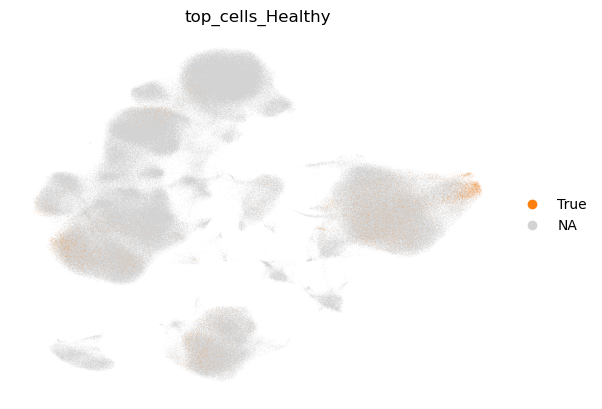

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


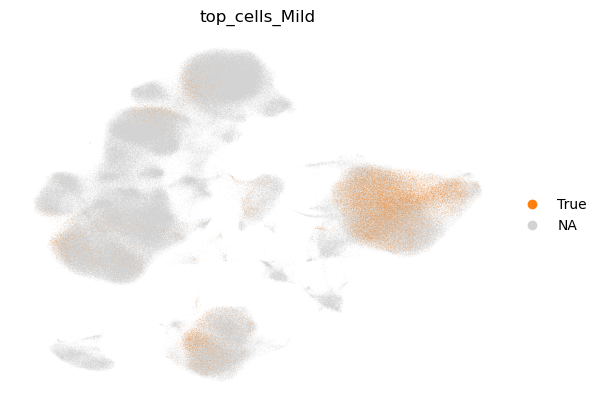

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


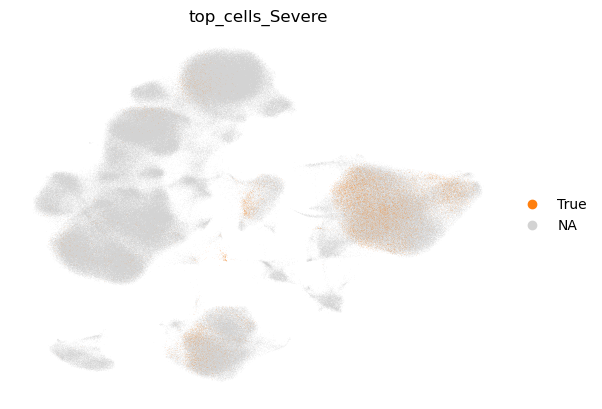

In [62]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

B_cell


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


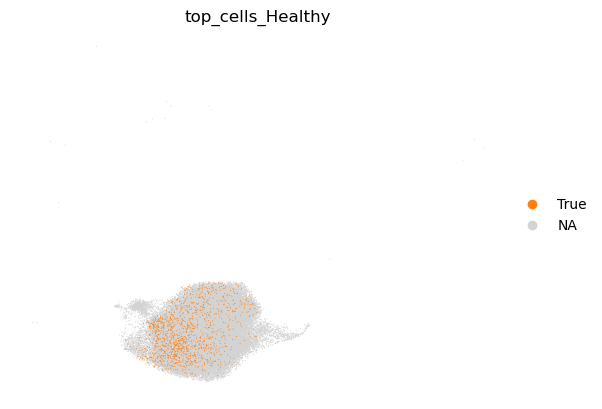

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


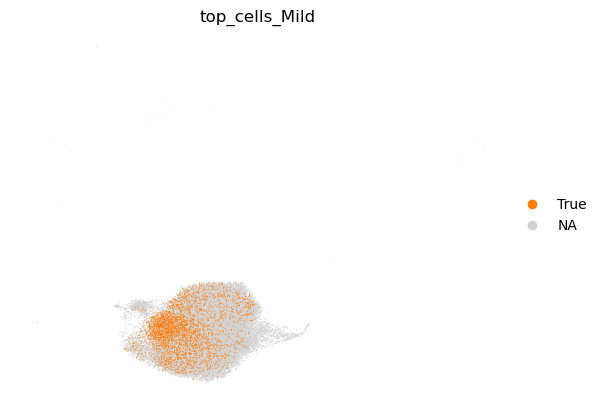

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


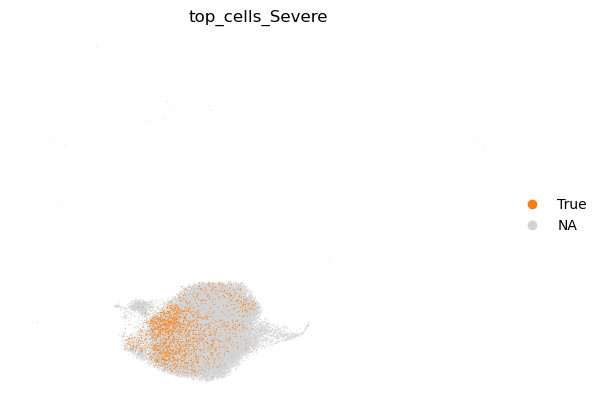

CD4


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


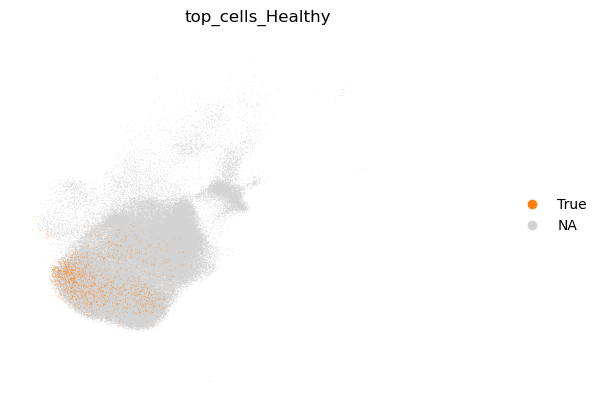

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


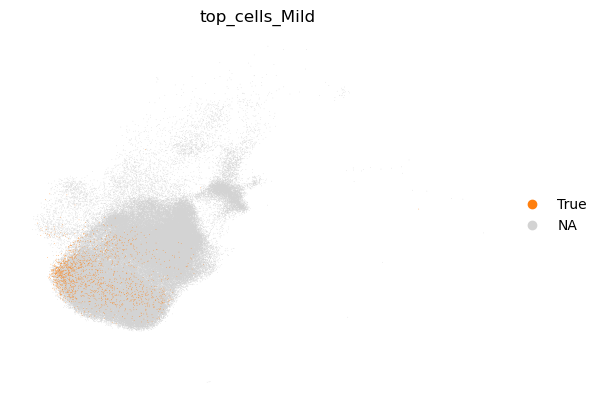

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


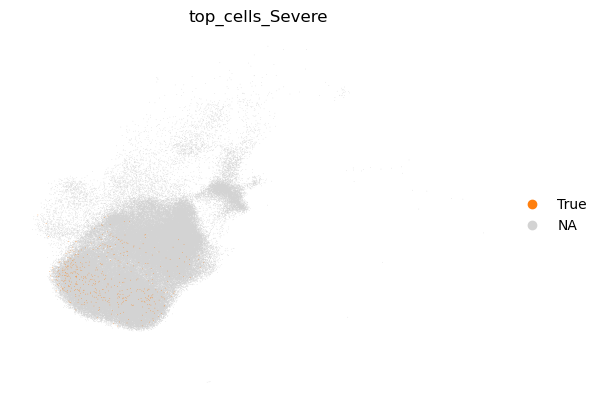

CD8


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


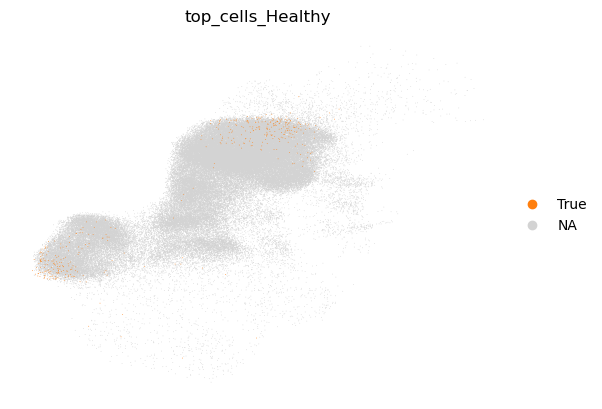

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


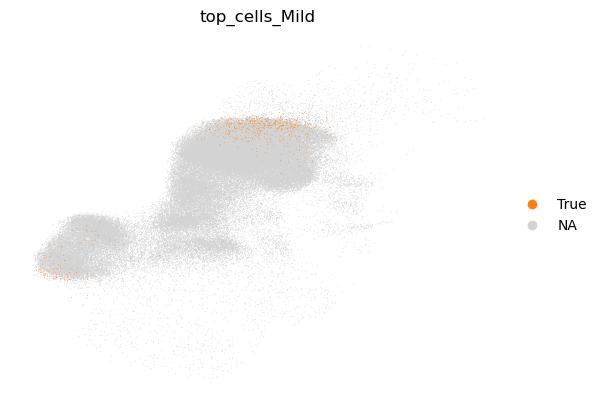

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


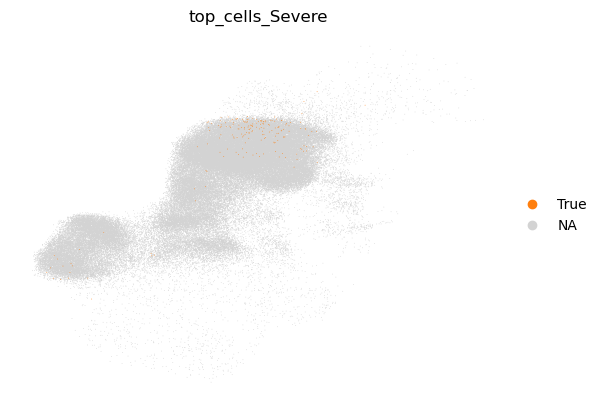

CD14


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


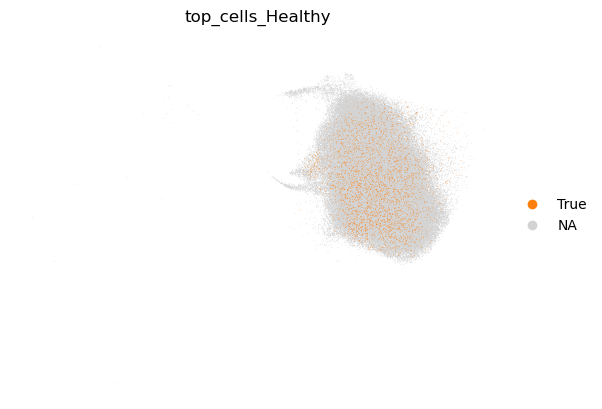

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


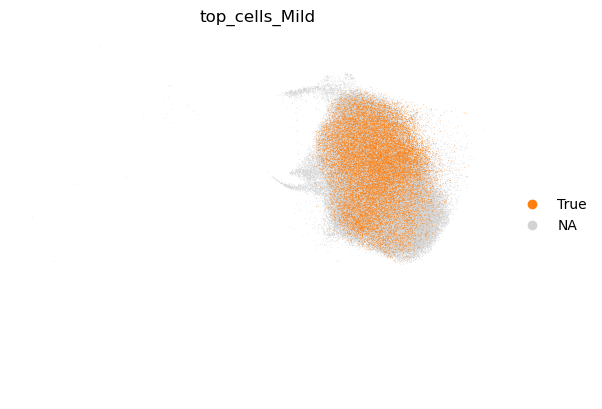

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


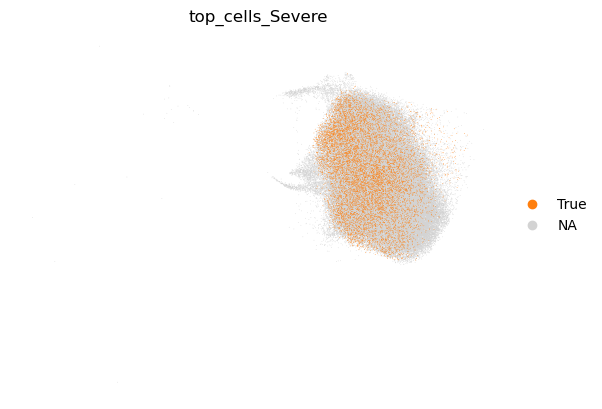

CD16


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


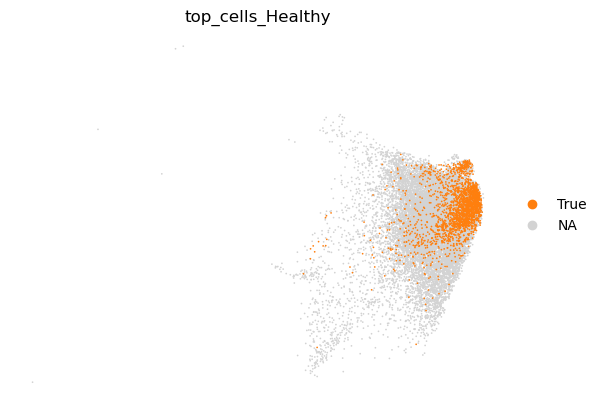

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


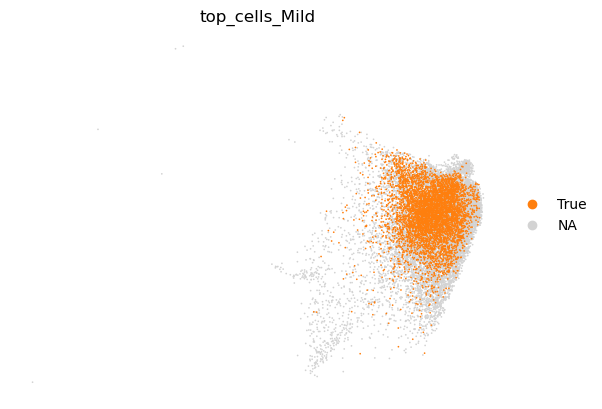

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


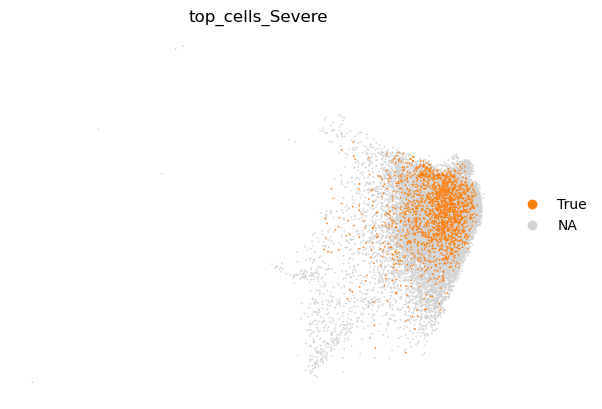

DCs


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


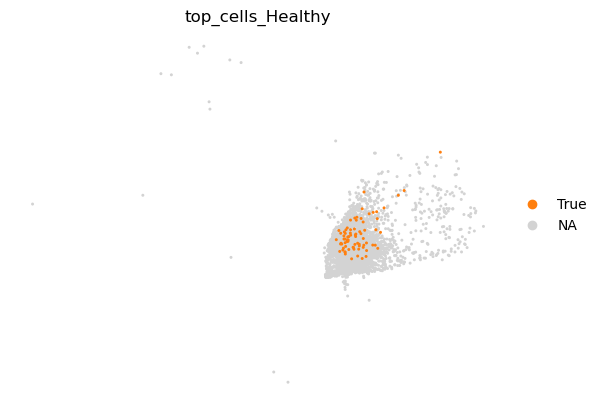

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


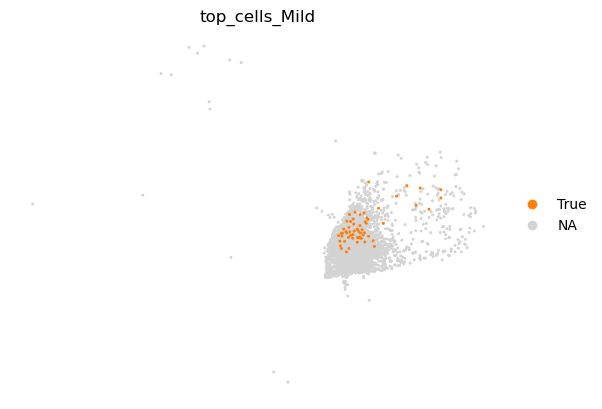

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


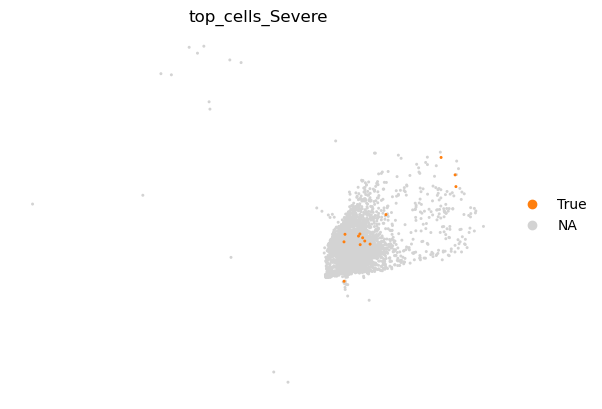

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


HSC


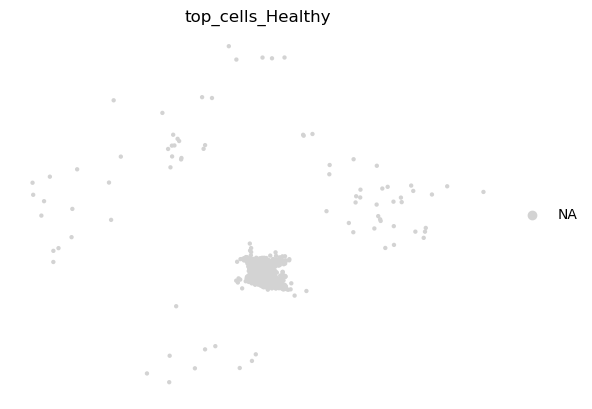

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


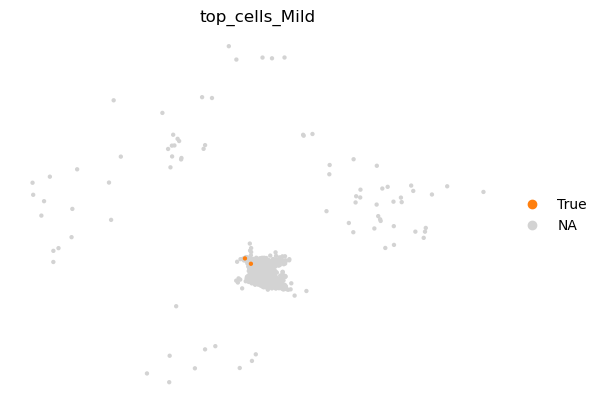

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


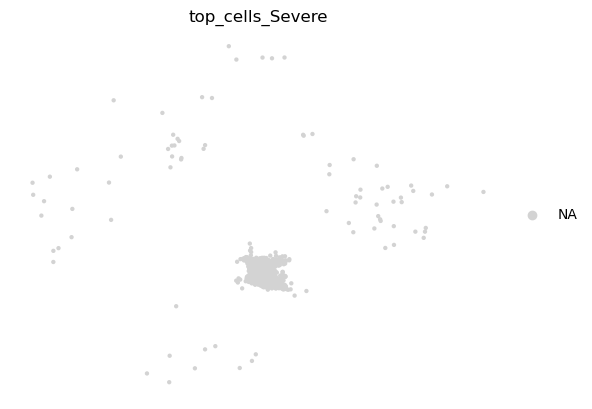

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Lymph_prolif


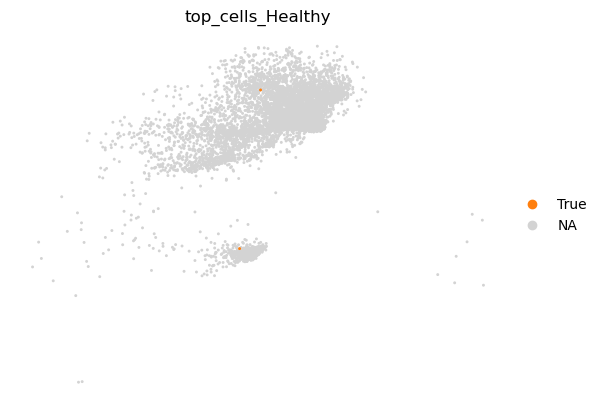

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


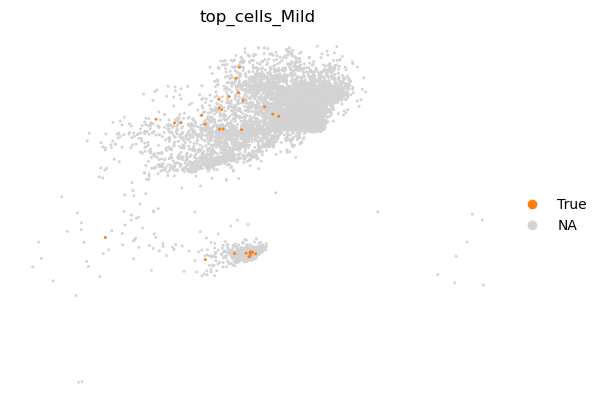

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


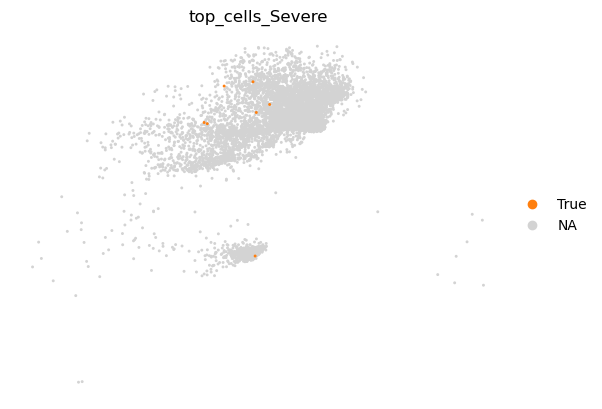

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


MAIT


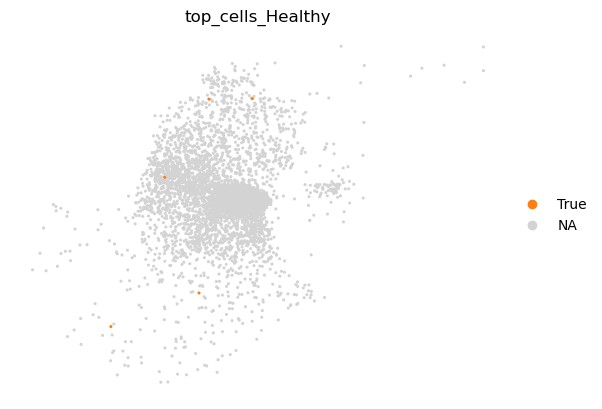

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


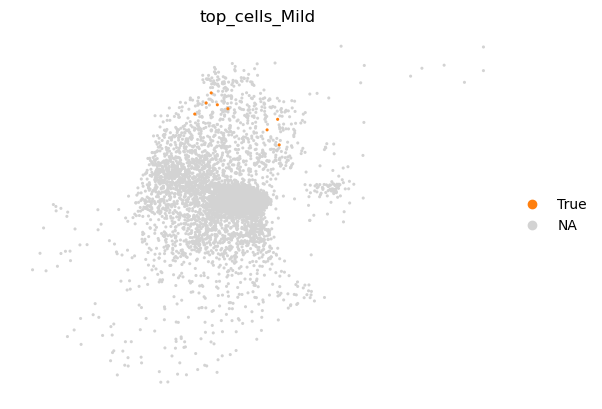

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


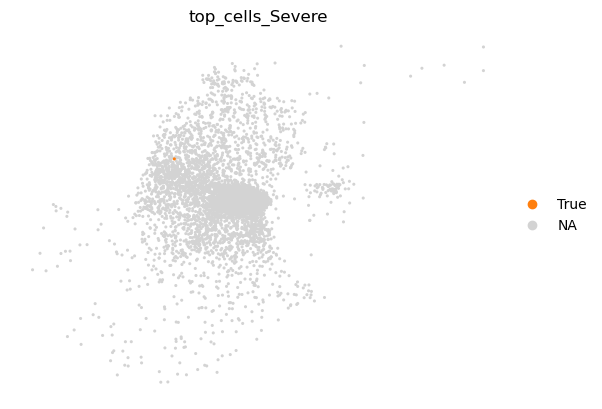

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Mono_prolif


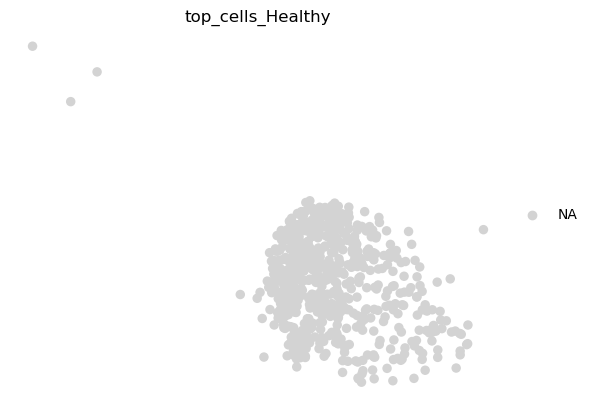

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


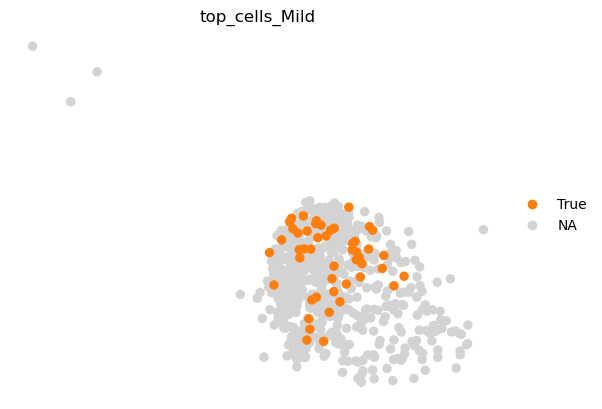

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


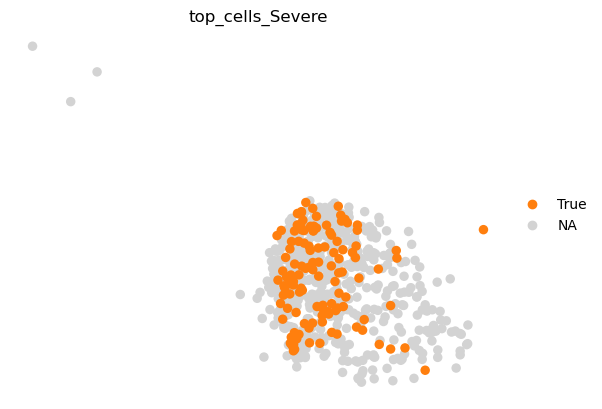

NK_16hi


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


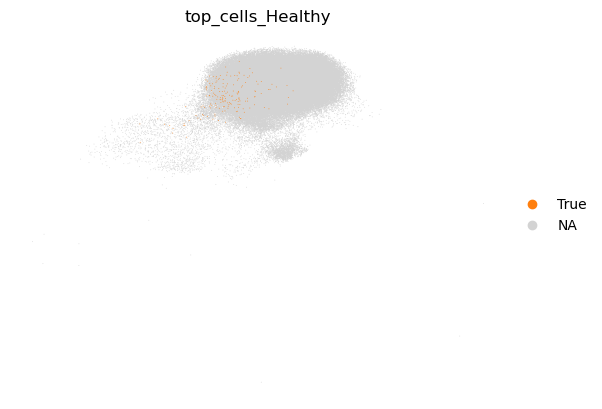

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


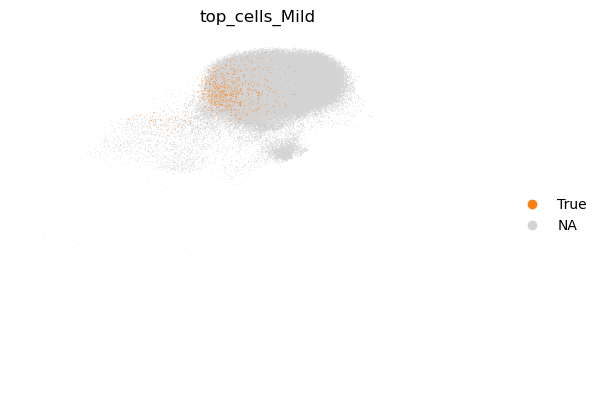

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


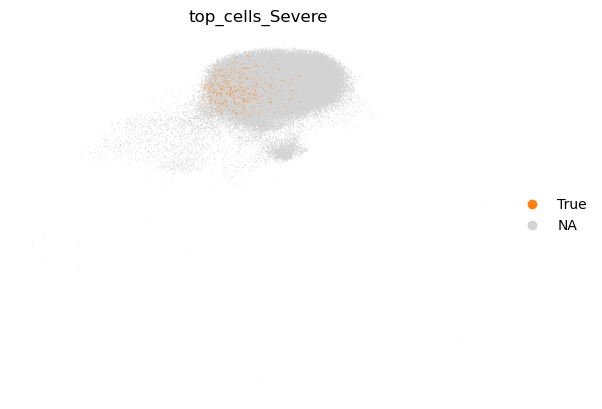

NK_56hi


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


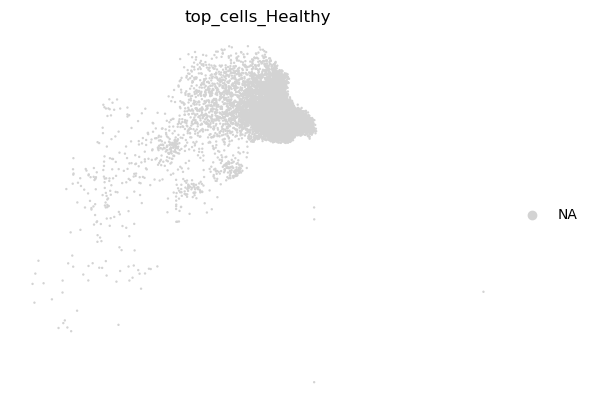

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


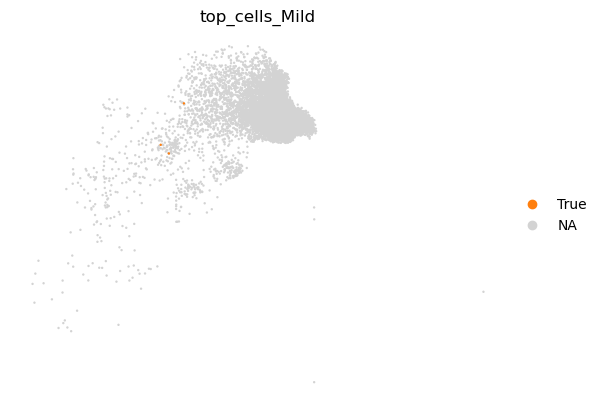

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


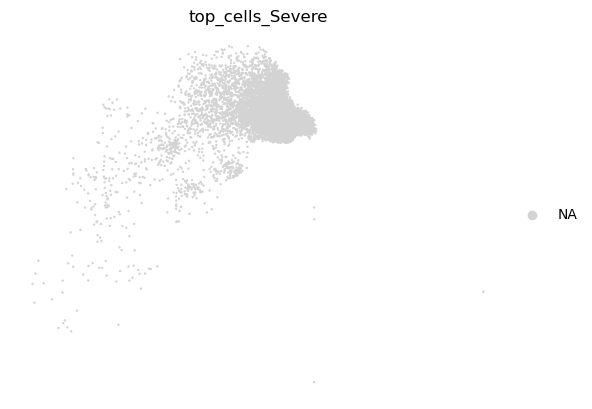

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Plasmablast


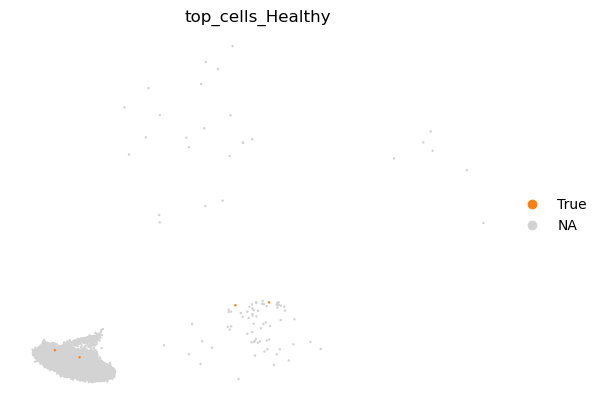

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


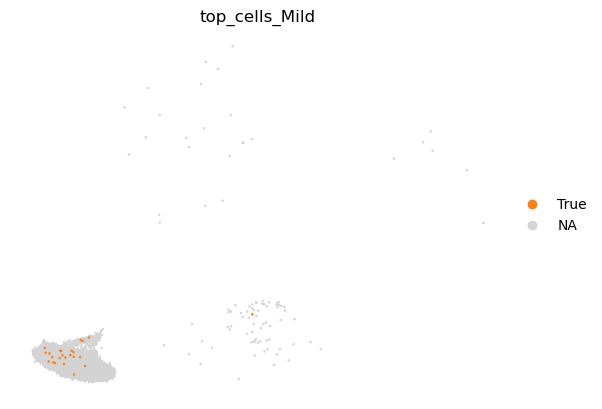

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


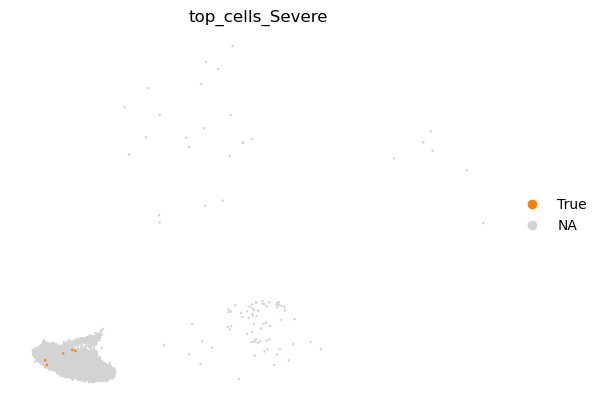

Platelets


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


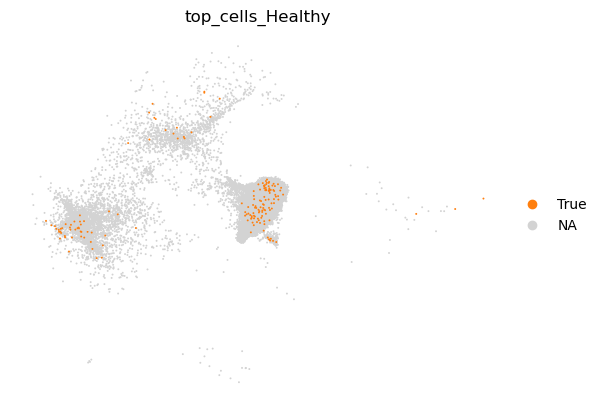

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


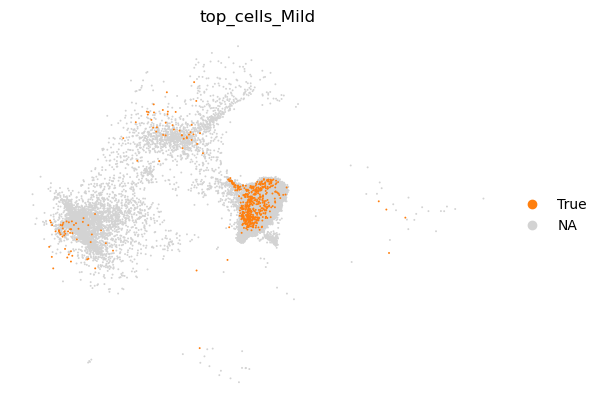

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


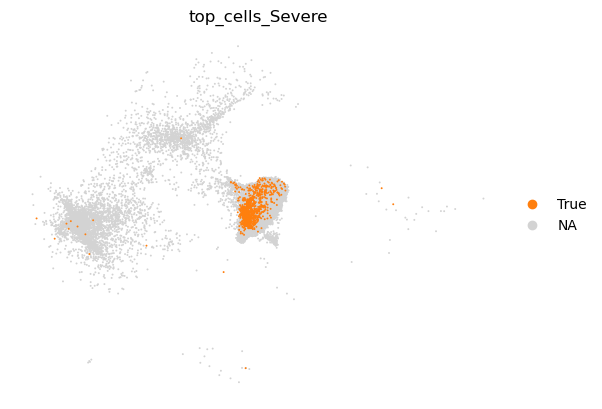

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


RBC


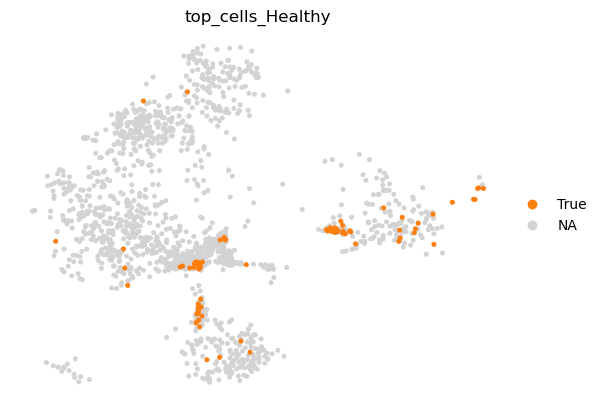

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


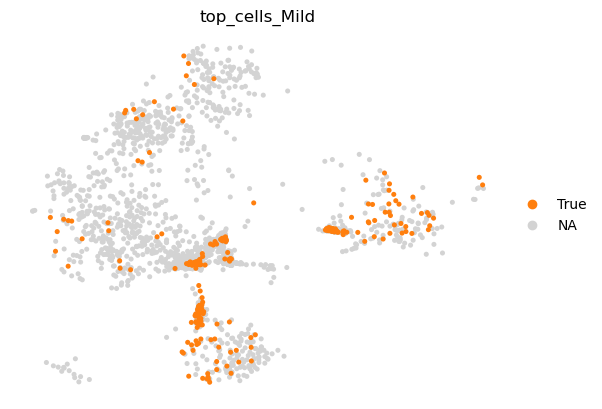

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


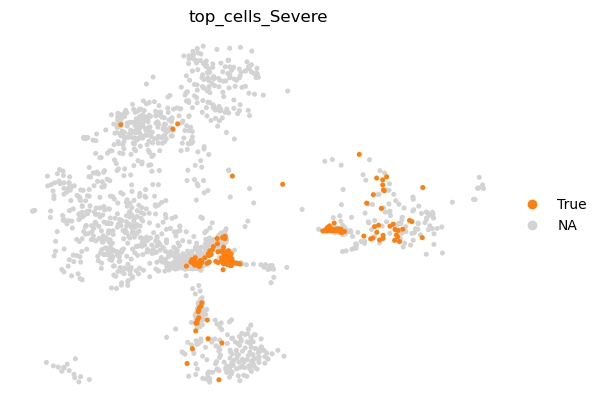

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Treg


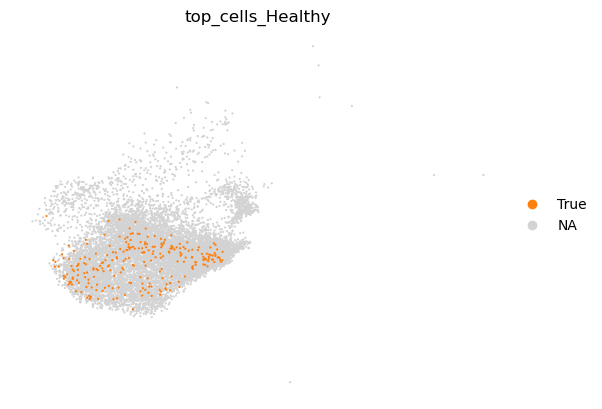

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


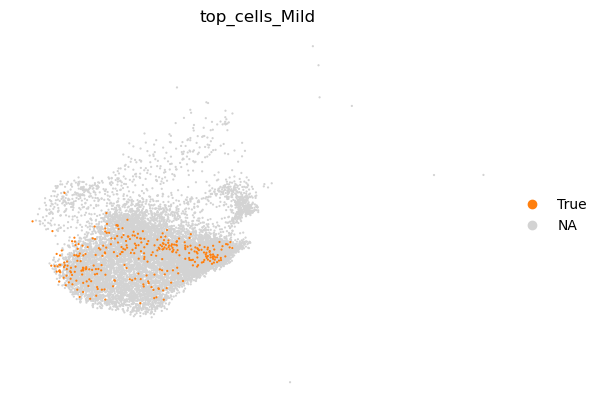

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


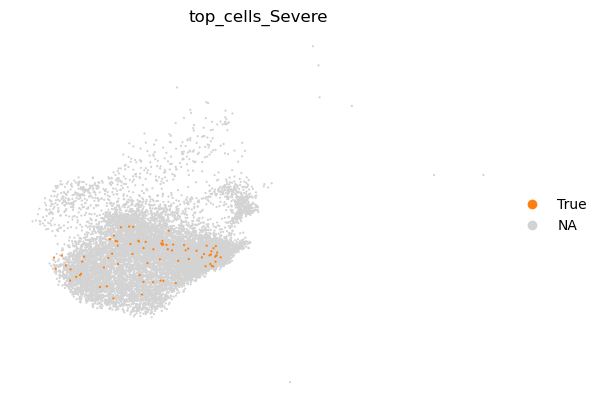

gdT


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


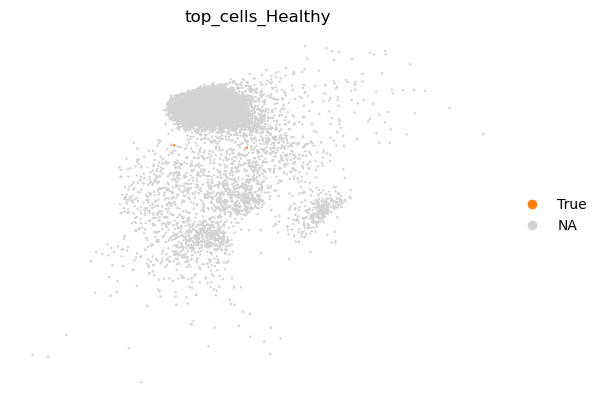

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


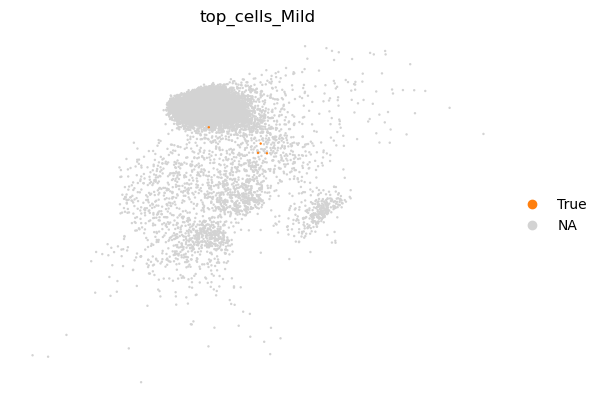

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


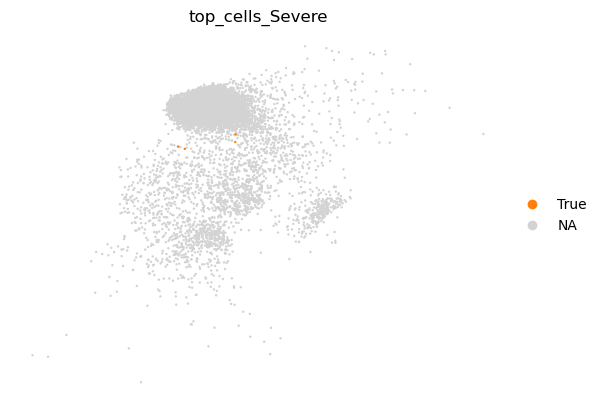

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


pDC


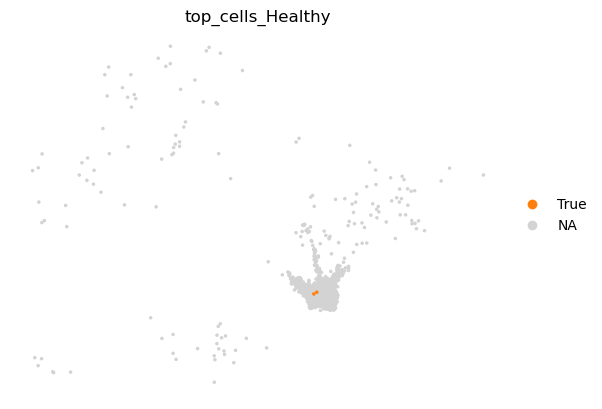

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


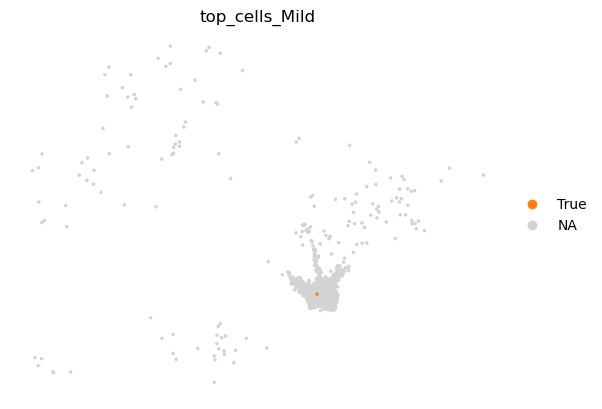

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


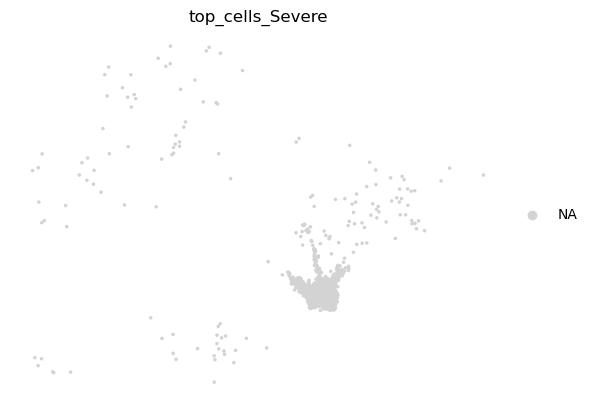

In [63]:
for ct in adata.obs['initial_clustering'].cat.categories:
    print('========')
    print(ct)
    adata_ct = adata[adata.obs['initial_clustering'] == ct].copy()
    for cond in np.unique(adata_ct.obs['Status_on_day_collection_summary']):
        sc.pl.umap(adata_ct, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [64]:
df = pd.concat(dfs)
df

initial_clustering  \
covid_index                                       
S11_AAAGATGCAAACTGCT-1                     CD14   
S11_AAAGTAGAGTCGAGTG-1                     CD14   
S11_AACACGTCATGGTCTA-1                     CD14   
S11_AACGTTGTCGCCAAAT-1                     CD14   
S11_AACTCAGAGGGATCTG-1                     CD14   
...                                         ...   
TTTGCGCCAGTGGAGT-newcastle74                CD4   
TTTGCGCCATATGCTG-newcastle74               CD16   
TTTGCGCCATCCGCGA-newcastle74               CD14   
TTTGCGCGTCTAAAGA-newcastle74                CD8   
TTTGTCATCTTCGAGA-newcastle74               CD16   

                             Status_on_day_collection_summary  
covid_index                                                    
S11_AAAGATGCAAACTGCT-1                                 Severe  
S11_AAAGTAGAGTCGAGTG-1                                 Severe  
S11_AACACGTCATGGTCTA-1                                 Severe  
S11_AACGTTGTCGCCAAAT-1                                 Severe  
S11_AACTCAGAGGGATCTG-1                                 Severe  
...                                                       ...  
TTTGCGCCAGTGGAGT-newcastle74                          Healthy  
TTTGCGCCATATGCTG-newcastle74                          Healthy  
TTTGCGCCATCCGCGA-newcastle74                          Healthy  
TTTGCGCGTCTAAAGA-newcastle74                          Healthy  
TTTGTCATCTTCGAGA-newcastle74                          Healthy  

[59118 rows x 2 columns]

In [65]:
df_group = df.groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)
df_group

Status_on_day_collection_summary  initial_clustering
Healthy                           CD14                  31.572987
                                  CD16                  22.544781
                                  CD4                   20.640313
                                  B_cell                12.898909
                                  CD8                    4.272184
                                  Treg                   2.563311
                                  NK_16hi                1.801524
                                  Platelets              1.688285
                                  RBC                    1.080914
                                  DCs                    0.782376
                                  MAIT                   0.051472
                                  Plasmablast            0.041178
                                  pDC                    0.020589
                                  gdT                    0.020589
                       

In [66]:
df_group = df_group.unstack().reindex(['Healthy', 'Mild', 'Severe'])

In [67]:
color = []
for ct in df_group.columns:
    idx = list(adata.obs['initial_clustering'].cat.categories).index(ct)
    color.append(adata.uns['initial_clustering_colors'][idx])
len(color)

18

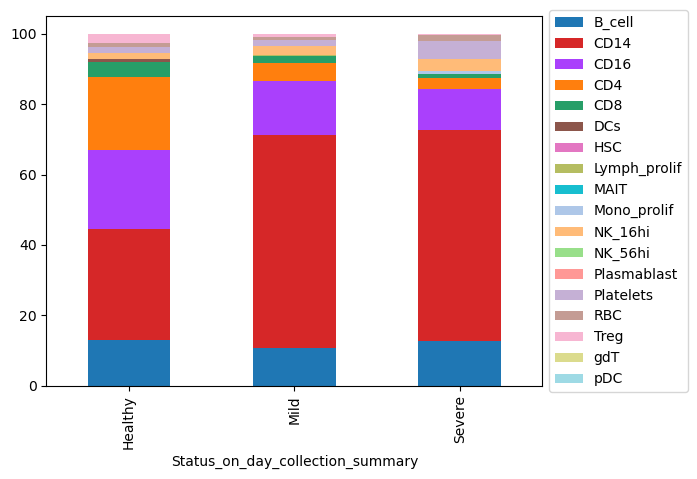

In [68]:
df_group.plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [92]:
IFN_genes = ["ABCE1", 	"ADAR", 	"BST2", 	"CACTIN", 	"CDC37", 	"CNOT7", 	"DCST1", 	"EGR1", 	"FADD", 	"GBP2", 	"HLA-A", 	"HLA-B", 	"HLA-C", 	"HLA-E", 	"HLA-F", 	"HLA-G", 	"HLA-H", 	"HSP90AB1", 	"IFI27", 	"IFI35", 	"IFI6", 	"IFIT1", 	"IFIT2", 	"IFIT3", 	"IFITM1", 	"IFITM2", 	"IFITM3", 	"IFNA1", 	"IFNA10", 	"IFNA13", 	"IFNA14", 	"IFNA16", 	"IFNA17", 	"IFNA2", 	"IFNA21", 	"IFNA4", 	"IFNA5", 	"IFNA6", 	"IFNA7", 	"IFNA8", 	"IFNAR1", 	"IFNAR2", 	"IFNB1", 	"IKBKE", 	"IP6K2", 	"IRAK1", 	"IRF1", 	"IRF2", 	"IRF3", 	"IRF4", 	"IRF5", 	"IRF6", 	"IRF7", 	"IRF8", 	"IRF9", 	"ISG15", 	"ISG20", 	"JAK1", 	"LSM14A", 	"MAVS", 	"METTL3", 	"MIR21", 	"MMP12", 	"MUL1", 	"MX1", 	"MX2", 	"MYD88", 	"NLRC5", 	"OAS1", 	"OAS2", 	"OAS3", 	"OASL", 	"PSMB8", 	"PTPN1", 	"PTPN11", 	"PTPN2", 	"PTPN6", 	"RNASEL", 	"RSAD2", 	"SAMHD1", 	"SETD2", 	"SHFL", 	"SHMT2", 	"SP100", 	"STAT1", 	"STAT2", 	"TBK1", 	"TREX1", 	"TRIM56", 	"TRIM6", 	"TTLL12", 	"TYK2", 	"UBE2K", 	"USP18", 	"WNT5A", 	"XAF1", 	"YTHDF2", 	"YTHDF3", 	"ZBP1"]
IFN_genes_yoshida = ["BST2", "CMPK2", "EIF2AK2", "EPSTI1", "HERC5", "IFI35", "IFI44L", "IFI6", "IFIT3", "ISG15", "LY6E", "MX1", "MX2", "OAS1", "OAS2", "PARP9", "PLSCR1", "SAMD9", "SAMD9L", "SP110", "STAT1", "TRIM22", "UBE2L6", "XAF1", "IRF7"]

In [70]:
len(IFN_genes)

99

In [94]:
len(IFN_genes_yoshida)

25

In [95]:
adata_full = sc.read('../../../../pipeline/data/pp/totalvi_pbmc.h5ad')
adata_full

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


AnnData object with n_obs × n_vars = 647366 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'protein_expression'
    layers: 'co

In [96]:
IFN_genes_common = list(set(IFN_genes).intersection(set(adata_full.var_names)))
len(IFN_genes_common)

29

In [97]:
IFN_genes_common_yo = list(set(IFN_genes_yoshida).intersection(set(adata_full.var_names)))
len(IFN_genes_common_yo)

12

In [98]:
adata_full = adata_full[adata.obs_names].copy()
adata_full

AnnData object with n_obs × n_vars = 590724 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', 'protein_expression'
    layers: 'co

In [99]:
sc.pp.normalize_total(adata_full, target_sum=1e4)
sc.pp.log1p(adata_full)

In [100]:
adata_full.obs['cell_attn'] = adata.obs['cell_attn'].copy()

In [101]:
adata_meyloid = adata_full[adata_full.obs.full_clustering.isin([
    'CD83_CD14_mono',
    'CD14_mono',
    'CD16_mono',
    'C1_CD16_mono',
    'DC1',
    'DC2',
    'DC3',
    'ASDC',
    'pDC',
    'DC_prolif',
    'Mono_prolif'
])].copy()

In [102]:
sc.tl.score_genes(adata_meyloid, IFN_genes_common_yo, score_name='IFN_score')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Cate

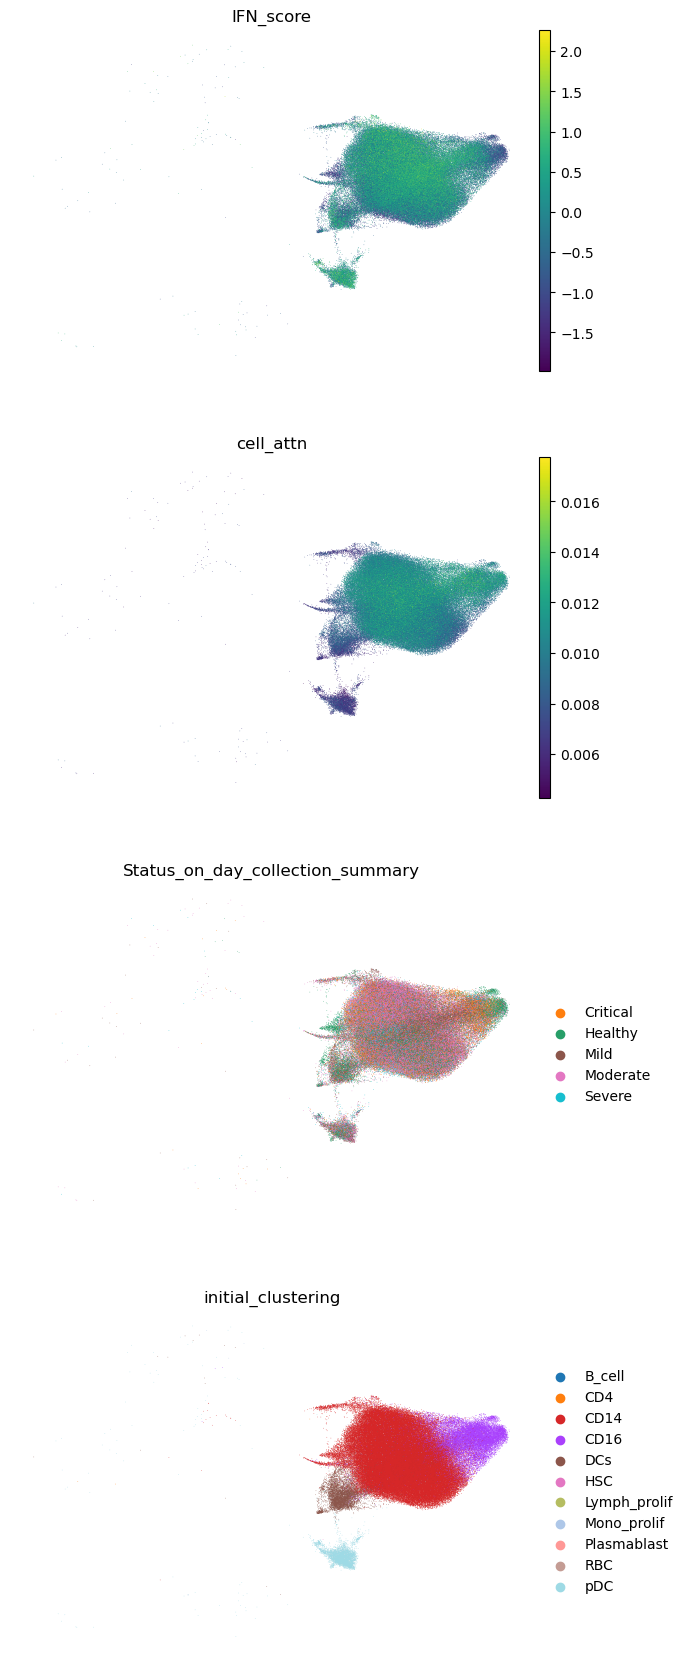

In [103]:
sc.pl.umap(adata_meyloid, color=['IFN_score', 'cell_attn', 'Status_on_day_collection_summary', 'initial_clustering'], frameon=False, ncols=1)

In [104]:
adata_covid_meyloid = adata_meyloid[adata_meyloid.obs['Status_on_day_collection_summary'] != 'Healthy'].copy()
adata_covid_meyloid

AnnData object with n_obs × n_vars = 131312 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch', 'cell_attn', 'IFN_score'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap', 'log1p'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', '

In [105]:
adata_covid_meyloid.obs[['IFN_score', 'cell_attn']]

IFN_score  cell_attn
covid_index                                     
AAACCTGCACCACGTG-MH9179824  -0.161947   0.007202
AAACCTGGTAAGGGAA-MH9179824  -0.524900   0.010293
AAACCTGGTGCGGTAA-MH9179824  -0.419178   0.009506
AAACCTGGTTCCCGAG-MH9179824  -0.306206   0.009601
AAACGGGAGTACTTGC-MH9179824  -0.241917   0.007855
...                               ...        ...
BGCV15_TATCTCATCCATGCTC-1   -1.404749   0.012983
BGCV15_TGCCCATTCACCTTAT-1   -0.989561   0.009101
BGCV15_TGCGGGTCAGGTGGAT-1   -1.209529   0.012169
BGCV15_TGCTACCCAGTCAGAG-1   -1.245459   0.010630
BGCV15_TGGTTCCTCTGCTGCT-1   -1.116305   0.011549

[131312 rows x 2 columns]

In [106]:
scores1 = adata_covid_meyloid.obs[['IFN_score', 'initial_clustering']]
scores2 = adata_covid_meyloid.obs[['cell_attn', 'initial_clustering']]
scores1 = scores1.rename(columns={'IFN_score': 'score'})
scores2 = scores2.rename(columns={'cell_attn': 'score'})
scores1['type'] = 'IFN score'
scores2['type'] = 'cell attention'
scores1['score'] = (scores1['score']-scores1['score'].min())/(scores1['score'].max()-scores1['score'].min())
scores2['score'] = (scores2['score']-scores2['score'].min())/(scores2['score'].max()-scores2['score'].min())
scores = pd.concat([scores1, scores2])
scores

score initial_clustering            type
covid_index                                                            
AAACCTGCACCACGTG-MH9179824  0.428121               CD14       IFN score
AAACCTGGTAAGGGAA-MH9179824  0.342708               CD14       IFN score
AAACCTGGTGCGGTAA-MH9179824  0.367588               CD14       IFN score
AAACCTGGTTCCCGAG-MH9179824  0.394173               CD14       IFN score
AAACGGGAGTACTTGC-MH9179824  0.409302               CD14       IFN score
...                              ...                ...             ...
BGCV15_TATCTCATCCATGCTC-1   0.645623               CD16  cell attention
BGCV15_TGCCCATTCACCTTAT-1   0.358384               CD14  cell attention
BGCV15_TGCGGGTCAGGTGGAT-1   0.585397               CD14  cell attention
BGCV15_TGCTACCCAGTCAGAG-1   0.471510               CD14  cell attention
BGCV15_TGGTTCCTCTGCTGCT-1   0.539556               CD14  cell attention

[262624 rows x 3 columns]

In [107]:
scores = scores[~scores['initial_clustering'].isin(['CD4', 'HSC', 'B_cell'])]
np.unique(scores['initial_clustering'])

array(['CD14', 'CD16', 'DCs', 'Lymph_prolif', 'Mono_prolif',
       'Plasmablast', 'RBC', 'pDC'], dtype=object)

In [108]:
scores['initial_clustering'] = scores['initial_clustering'].astype(str)

/tmp/ipykernel_2806604/4255340119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['initial_clustering'] = scores['initial_clustering'].astype(str)


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'CD14'),
  Text(1, 0, 'CD16'),
  Text(2, 0, 'DCs'),
  Text(3, 0, 'pDC'),
  Text(4, 0, 'Mono_prolif'),
  Text(5, 0, 'Plasmablast'),
  Text(6, 0, 'RBC'),
  Text(7, 0, 'Lymph_prolif')])

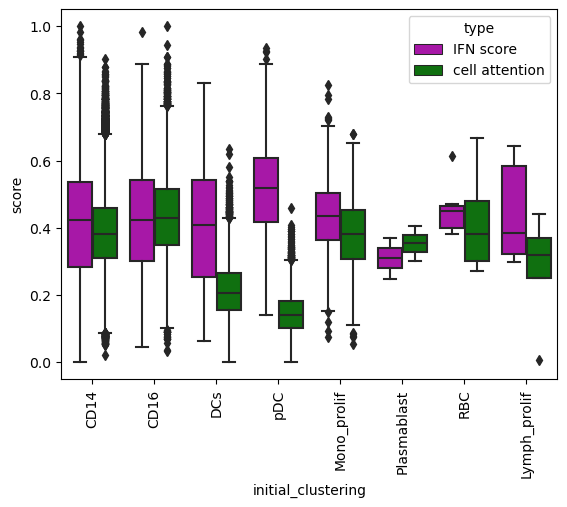

In [109]:
sns.boxplot(x="initial_clustering", y="score",
            hue="type", palette=["m", "g"],
            data=scores)
plt.xticks(rotation=90)

In [110]:
ifn_scores = scores[scores['type'] == 'IFN score']
cell_attn_scores = scores[scores['type'] == 'cell attention']

In [111]:
np.sum(ifn_scores.index != cell_attn_scores.index)

0

In [113]:
import scipy

In [114]:
scipy.stats.pearsonr(ifn_scores['score'], cell_attn_scores['score'])

PearsonRResult(statistic=-0.03049754413063578, pvalue=2.1057894710127354e-28)

In [115]:
monocd14 = adata_covid_meyloid[adata_covid_meyloid.obs['initial_clustering'] == 'CD14'].copy()
monocd14

AnnData object with n_obs × n_vars = 105834 × 2000
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch', 'cell_attn', 'IFN_score'
    var: 'feature_types', 'means', 'variances', 'residual_variances', 'highly_variable_rank', 'highly_variable_nbatches', 'highly_variable_intersection', 'highly_variable'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'initial_clustering_colors', 'leiden', 'neighbors', 'pca', 'umap', 'log1p'
    obsm: 'X_pca', 'X_pca_harmony', 'X_totalVI', 'X_umap', '_scvi_extra_categorical_covs', '

In [117]:
scipy.stats.pearsonr(monocd14.obs['IFN_score'], monocd14.obs['cell_attn'])

PearsonRResult(statistic=0.011732444618161756, pvalue=0.00013513817402299434)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Cate

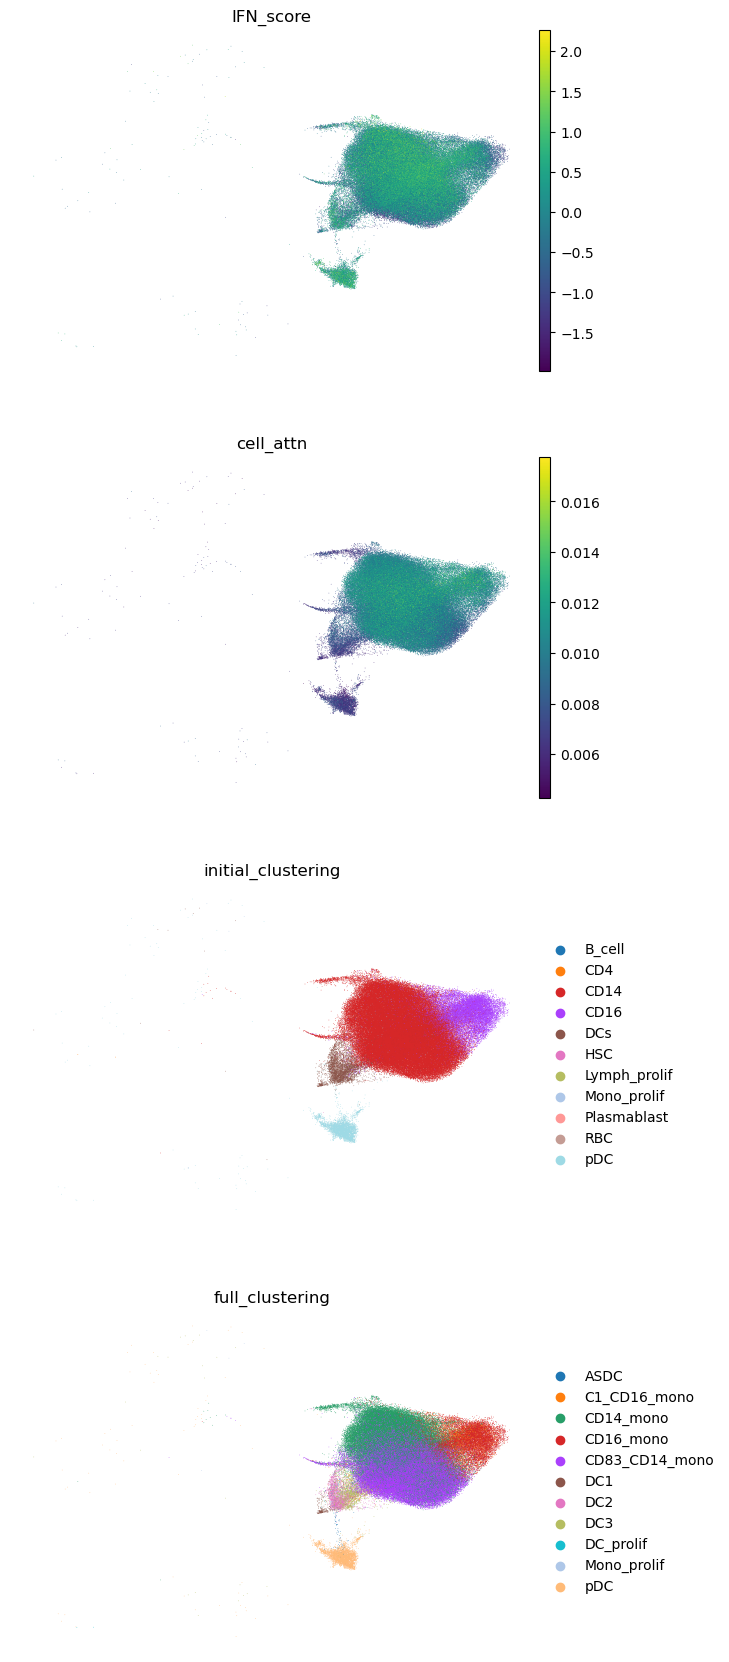

In [116]:
sc.pl.umap(adata_covid_meyloid, color=['IFN_score', 'cell_attn', 'initial_clustering','full_clustering'], ncols=1, frameon=False)

In [122]:
adata

AnnData object with n_obs × n_vars = 590724 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', '_scvi_labels', '_scvi_batch', 'group', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    uns: 'Status_on_day_collection_summary_colors', 'initial_clustering_colors', 'top_cells_Healthy_colors', 'top_cells_Mild_colors', 'top_cells_Severe_colors'
    obsm: 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'

In [124]:
adata_covid_meyloid.obs['Status_on_day_collection_summary'] = adata[adata_covid_meyloid.obs_names].obs['Status_on_day_collection_summary']
adata_covid_meyloid.obs['top_cells_Healthy'] = adata.obs['top_cells_Healthy']
adata_covid_meyloid.obs['top_cells_Mild'] = adata.obs['top_cells_Mild']
adata_covid_meyloid.obs['top_cells_Severe'] = adata.obs['top_cells_Severe']

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


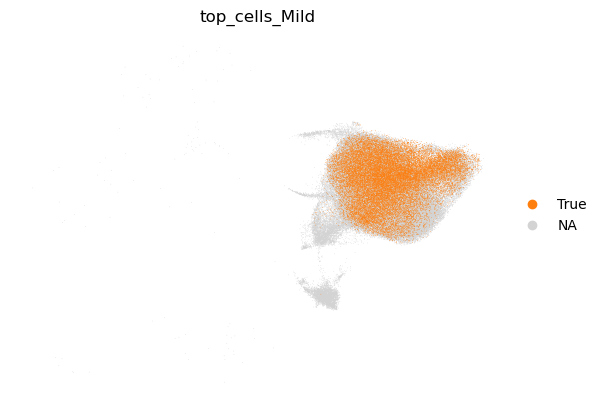

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


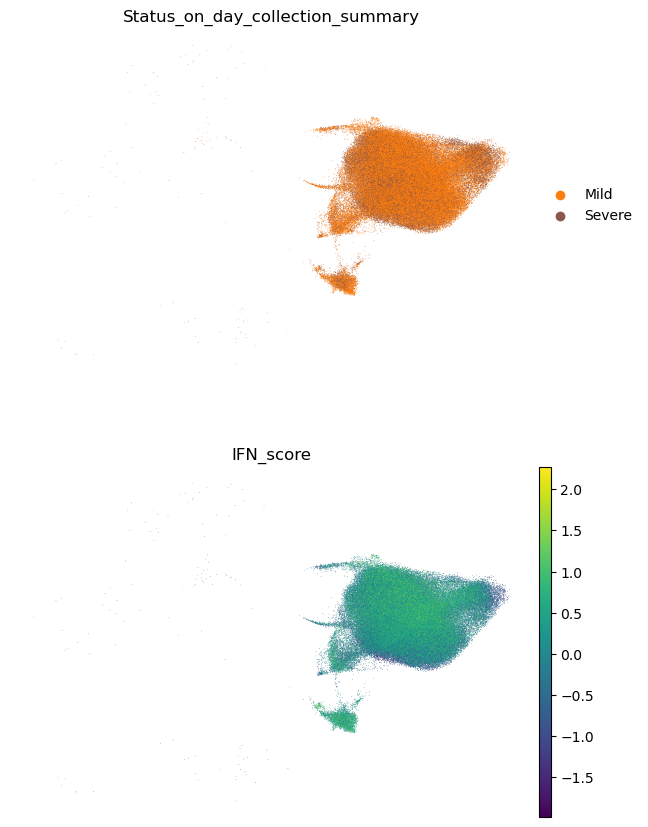

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


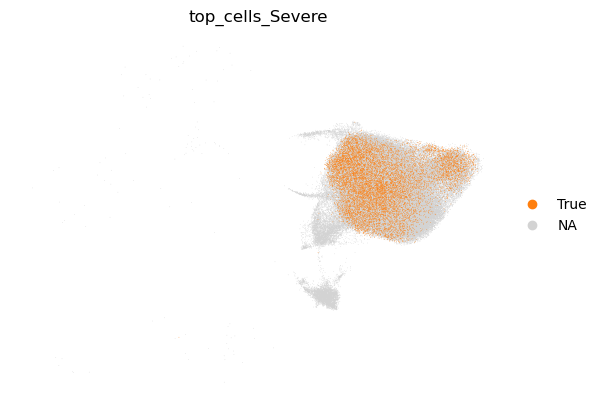

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/differential-gene-expression/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


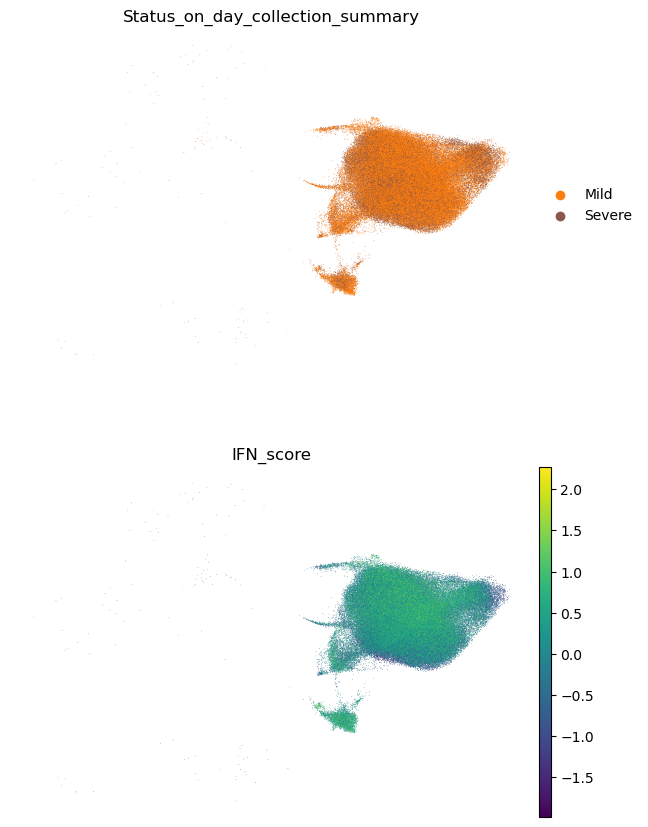

In [126]:
for cond in np.unique(adata_covid_meyloid.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata_covid_meyloid, color=[f'top_cells_{cond}'], groups=[True], frameon=False)
    sc.pl.umap(adata_covid_meyloid, color=['Status_on_day_collection_summary', 'IFN_score'], ncols=1, frameon=False)

In [128]:
monocd14.obs['Status_on_day_collection_summary'].value_counts()

Status_on_day_collection_summary
Moderate    52237
Mild        25673
Critical    14229
Severe      13695
Name: count, dtype: int64